In [1]:
from utlities.cal_utils import Format, Analyze

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker  # Import ticker module

import seaborn as sns
import math
import scipy

import numpy as np


import os

rep = "2"
path_data = f"./Data/rep{rep}_data.xlsx"
path_md = f"./picker_suggestions_modified/rep{rep}_edited.xlsx"


folder = f"./rep{rep}_data_analysis"

form = Format(path = path_data)
analyze = Analyze()

sns.set_style("darkgrid")
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [2]:
if not os.path.exists(folder):

    # if the demo_folder directory is not present
    # then create it.
    os.makedirs(folder)

In [3]:
if not os.path.exists(f'./picker_outputs_rep{rep}/Rep{rep}_df.csv'):

    df = form.tidy_file(delta = False, average = True)
    df.to_csv(f'./picker_outputs_rep{rep}/Rep{rep}_df.csv', index=False)

In [4]:
#load the first exel file in tidy format
df = pd.read_csv(f'./picker_outputs_rep{rep}/Rep{rep}_df.csv')


#the start times selected by chelsea and the end times selected by me
md = pd.read_excel(path_md)


In [5]:
df

Time (sec) [hr]:[min]:[sec]       A.U.  Normalized A.U.  Cell #  \
0             1.295  00:00:01.295000   2.688000         0.993348  Cell 1   
1             2.590  00:00:02.590000   2.562000         0.946785  Cell 1   
2             3.885         00:00:04   2.812000         1.039172  Cell 1   
3             5.180  00:00:05.180000   3.000000         1.108647  Cell 1   
4             6.475  00:00:06.475000   2.688000         0.993348  Cell 1   
...             ...              ...        ...              ...     ...   
1106189    3264.695  00:54:24.695000  15.942824         4.166969     AVG   
1106190    3265.990  00:54:25.990000  16.354588         4.274592     AVG   
1106191    3267.285  00:54:27.285000  16.248529         4.246871     AVG   
1106192    3268.580  00:54:28.580000  16.050765         4.195182     AVG   
1106193    3269.875  00:54:29.875000  16.199294         4.234003     AVG   

                       Treatment  
0          NoRTG NoInh - Islet 1  
1          NoRTG NoInh - Islet 1  
2          NoRTG NoInh - Islet 1  
3          NoRTG NoInh - Islet 1  
4          NoRTG NoInh - Islet 1  
...                          ...  
1106189  10wt% RTG Inh - Islet 3  
1106190  10wt% RTG Inh - Islet 3  
1106191  10wt% RTG Inh - Islet 3  
1106192  10wt% RTG Inh - Islet 3  
1106193  10wt% RTG Inh - Islet 3  

[1106194 rows x 6 columns]

In [6]:
examp = md[md["Represent"] == True]
examp

Treatment  11 mM Stimulus  20 mM Stimulus  \
3        NoRTG NoInh - Islet 1             480            1740   
7        NoRTG NoInh - Islet 1             480            1740   
11       NoRTG NoInh - Islet 1             480            1740   
14       NoRTG NoInh - Islet 1             480            1740   
32       NoRTG NoInh - Islet 1             480            1740   
34       NoRTG NoInh - Islet 1             480            1740   
79    5wt% RTG NoInh - Islet 1            1020            1500   
86    5wt% RTG NoInh - Islet 1            1020            1500   
90    5wt% RTG NoInh - Islet 1            1020            1500   
93    5wt% RTG NoInh - Islet 1            1020            1500   
106   5wt% RTG NoInh - Islet 1            1020            1500   
115   5wt% RTG NoInh - Islet 1            1020            1500   
235  10wt% RTG NoInh - Islet 3            1020            1500   
236  10wt% RTG NoInh - Islet 3            1020            1500   
246  10wt% RTG NoInh - Islet 3            1020            1500   
251  10wt% RTG NoInh - Islet 3            1020            1500   
257  10wt% RTG NoInh - Islet 3            1020            1500   
264  10wt% RTG NoInh - Islet 3            1020            1500   

     End 11 mM 2nd Phase  KCL Stimulus  11 mM End  End Option 1  End Option 2  \
3                    NaN          2700    928.515       928.515      1522.920   
7                    NaN          2700    920.745       920.745      1059.310   
11                   NaN          2700   1122.765      1122.765      1348.095   
14                   NaN          2700   1087.800      1087.800      1261.330   
32                   NaN          2700   1094.275      1094.275      1363.635   
34                   NaN          2700   1099.455      1099.455      1364.930   
79                   NaN          2940   1305.360      1090.390      1305.360   
86                   NaN          2940   1340.325      1102.045      1340.325   
90                   NaN          2940   1311.835      1074.850      1311.835   
93                   NaN          2940   1370.000      1091.685      1363.635   
106                  NaN          2940   1250.970      1250.970           NaN   
115                  NaN          2940   1430.000           NaN           NaN   
235                  NaN          2940   1205.645      1205.645      1336.440   
236                  NaN          2940   1170.000      1326.080           NaN   
246                  NaN          2940   1160.000      1221.185           NaN   
251                  NaN          2940   1250.000      1026.935           NaN   
257                  NaN          2940   1250.000      1069.670           NaN   
264                  NaN          2940   1300.000           NaN           NaN   

     End Option 3  Represent Example Cells  Quality   Notes  \
3        1736.595       True        Cell 4        1  custom   
7        1394.715       True        Cell 8        1     NaN   
11       1701.630       True       Cell 12        1     NaN   
14       1373.995       True       Cell 15        1     NaN   
32            NaN       True       Cell 33        1     NaN   
34       1526.805       True           AVG        2  Custom   
79            NaN       True       Cell 13        1     NaN   
86            NaN       True       Cell 20        1     NaN   
90            NaN       True       Cell 24        1     NaN   
93            NaN       True       Cell 27        1     NaN   
106           NaN       True       Cell 40        1     NaN   
115           NaN       True           AVG        3     NaN   
235           NaN       True        Cell 2        1     NaN   
236           NaN       True        Cell 3        1  custom   
246           NaN       True       Cell 13        1  custom   
251           NaN       True       Cell 18        1     NaN   
257           NaN       True       Cell 24        3     NaN   
264           NaN       True           AVG        3     NaN   

    Send to Farnsworth  Unna

In [7]:
new_dfs = []

for treat in examp.Treatment.unique():
    temp_md = examp[examp.Treatment == treat]
    temp_df = df[df.Treatment == treat]

    cells = temp_md["Example Cells"].unique()
    print(cells)

    temp_df = temp_df[temp_df["Cell #"].isin(cells)]
    new_dfs.append(temp_df)

df = pd.concat(new_dfs)

['Cell 4' 'Cell 8' 'Cell 12' 'Cell 15' 'Cell 33' 'AVG']
['Cell 13' 'Cell 20' 'Cell 24' 'Cell 27' 'Cell 40' 'AVG']
['Cell 2' 'Cell 3' 'Cell 13' 'Cell 18' 'Cell 24' 'AVG']


In [8]:
df[df["Treatment"]==treat]["Cell #"].unique()

array(['Cell 2', 'Cell 3', 'Cell 13', 'Cell 18', 'Cell 24', 'AVG'],
      dtype=object)

In [9]:
for treat in list(df.Treatment.unique()):
    print(treat)
    print(len(df[df.Treatment == treat]["Cell #"].unique()))

NoRTG NoInh - Islet 1
6
5wt% RTG NoInh - Islet 1
6
10wt% RTG NoInh - Islet 3
6


In [10]:
from math import log10, floor
def round_sig(x, sig=1, small_value=1.0e-9):
    rounded = round(x, sig - int(floor(log10(max(abs(x), abs(small_value))))) - 1)

    return rounded

In [11]:
md

Treatment  11 mM Stimulus  20 mM Stimulus  \
0        NoRTG NoInh - Islet 1             480            1740   
1        NoRTG NoInh - Islet 1             480            1740   
2        NoRTG NoInh - Islet 1             480            1740   
3        NoRTG NoInh - Islet 1             480            1740   
4        NoRTG NoInh - Islet 1             480            1740   
..                         ...             ...             ...   
260  10wt% RTG NoInh - Islet 3            1020            1500   
261  10wt% RTG NoInh - Islet 3            1020            1500   
262  10wt% RTG NoInh - Islet 3            1020            1500   
263  10wt% RTG NoInh - Islet 3            1020            1500   
264  10wt% RTG NoInh - Islet 3            1020            1500   

     End 11 mM 2nd Phase  KCL Stimulus  11 mM End  End Option 1  End Option 2  \
0                    NaN          2700   1159.025      1159.025      1521.625   
1                    NaN          2700   1095.570      1095.570      1375.290   
2                    NaN          2700   1214.710      1214.710      1516.445   
3                    NaN          2700    928.515       928.515      1522.920   
4                    NaN          2700    980.315       980.315      1517.740   
..                   ...           ...        ...           ...           ...   
260                  NaN          2940   1385.650      1055.425      1385.650   
261                  NaN          2940   1370.110      1114.995      1370.110   
262                  NaN          2940   1380.000      1108.520           NaN   
263                  NaN          2940   1300.000           NaN           NaN   
264                  NaN          2940   1300.000           NaN           NaN   

     End Option 3  Represent Example Cells  Quality   Notes  \
0        1699.040      False        Cell 1        2     NaN   
1        1517.740      False        Cell 2        1     NaN   
2        1714.580      False        Cell 3        1     NaN   
3        1736.595       True        Cell 4        1  custom   
4        1705.515      False        Cell 5        1     NaN   
..            ...        ...           ...      ...     ...   
260           NaN      False       Cell 27        3     150   
261           NaN      False       Cell 28        3      95   
262           NaN      False       Cell 29        2  custom   
263           NaN      False      Cell Avg        3     NaN   
264           NaN       True           AVG        3     NaN   

    Send to Farnsworth  Unnamed: 14 Unnamed: 15 Unnamed: 16  Unnamed: 17  \
0                  NaN          NaN         NaN         NaN          NaN   
1                  NaN          NaN         NaN         NaN          NaN   
2                  NaN          NaN         NaN         NaN          NaN   
3                  NaN          NaN         NaN         NaN          NaN   
4                  NaN          NaN        True         NaN          NaN   
..                 ...          ...         ...         ...          ...   
260                NaN          NaN         NaN         NaN          NaN   
261                NaN          NaN         NaN         NaN          NaN   
262                NaN          NaN         NaN         NaN          NaN   
263                NaN          NaN         NaN         NaN          NaN   
264                NaN          NaN         NaN         NaN          NaN   

     Unnamed: 18  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
260          NaN  
261          NaN  
262          NaN  
263          NaN  
264          NaN  

[265 rows x 19 columns]

In [12]:
if not os.path.exists(f'{folder}/Seperations'): 
      
     # if the demo_folder directory is not present then create it
                        
    os.makedirs(f'{folder}/Seperations')

NoRTG NoInh - Islet 1
['Cell 4' 'Cell 8' 'Cell 12' 'Cell 15' 'Cell 33' 'AVG']


5wt% RTG NoInh - Islet 1
['Cell 13' 'Cell 20' 'Cell 24' 'Cell 27' 'Cell 40' 'AVG']
10wt% RTG NoInh - Islet 3
['Cell 2' 'Cell 3' 'Cell 13' 'Cell 18' 'Cell 24' 'AVG']


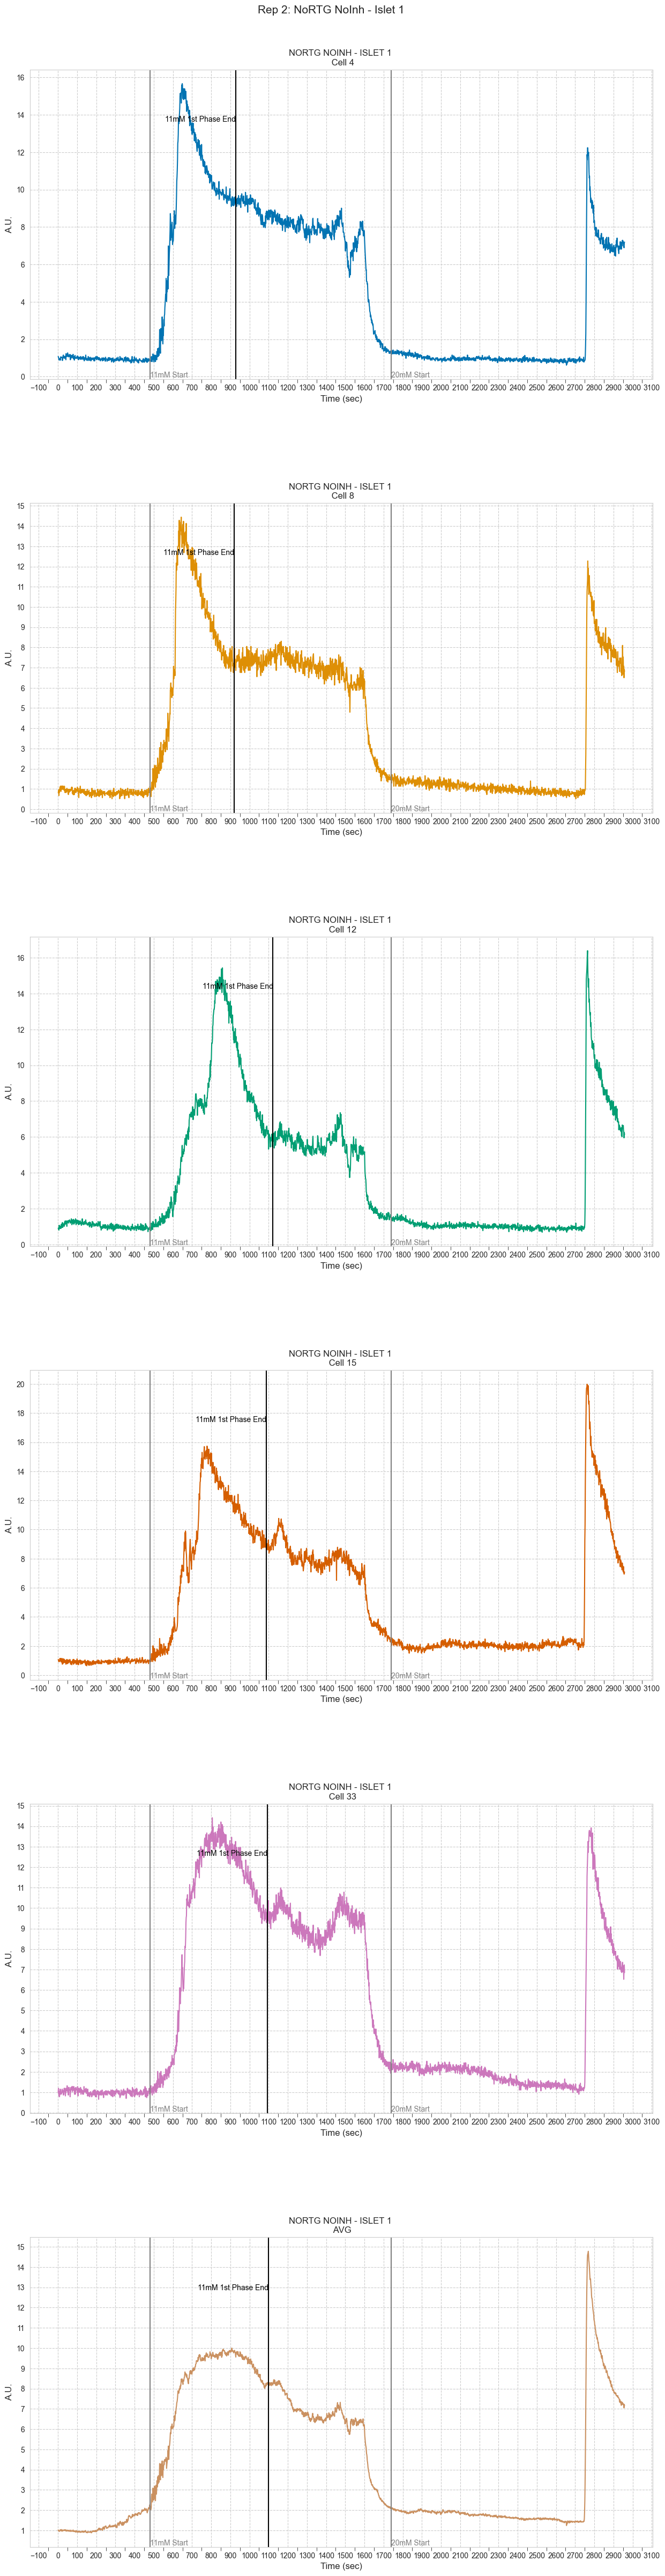

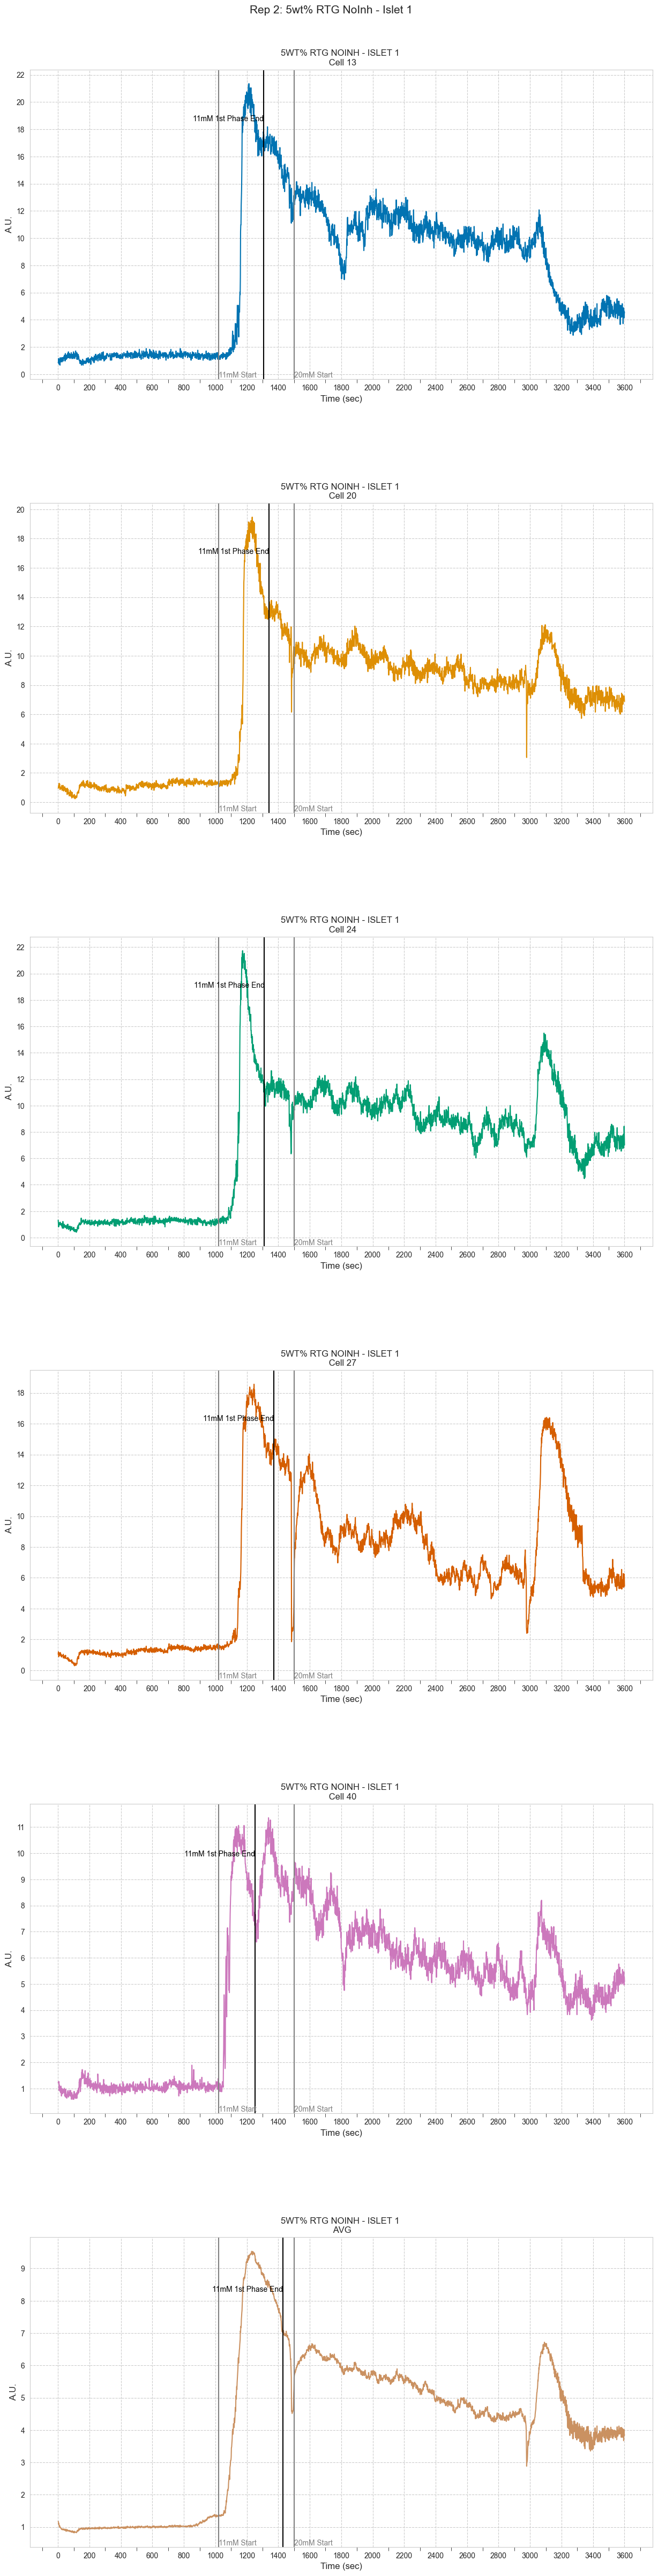

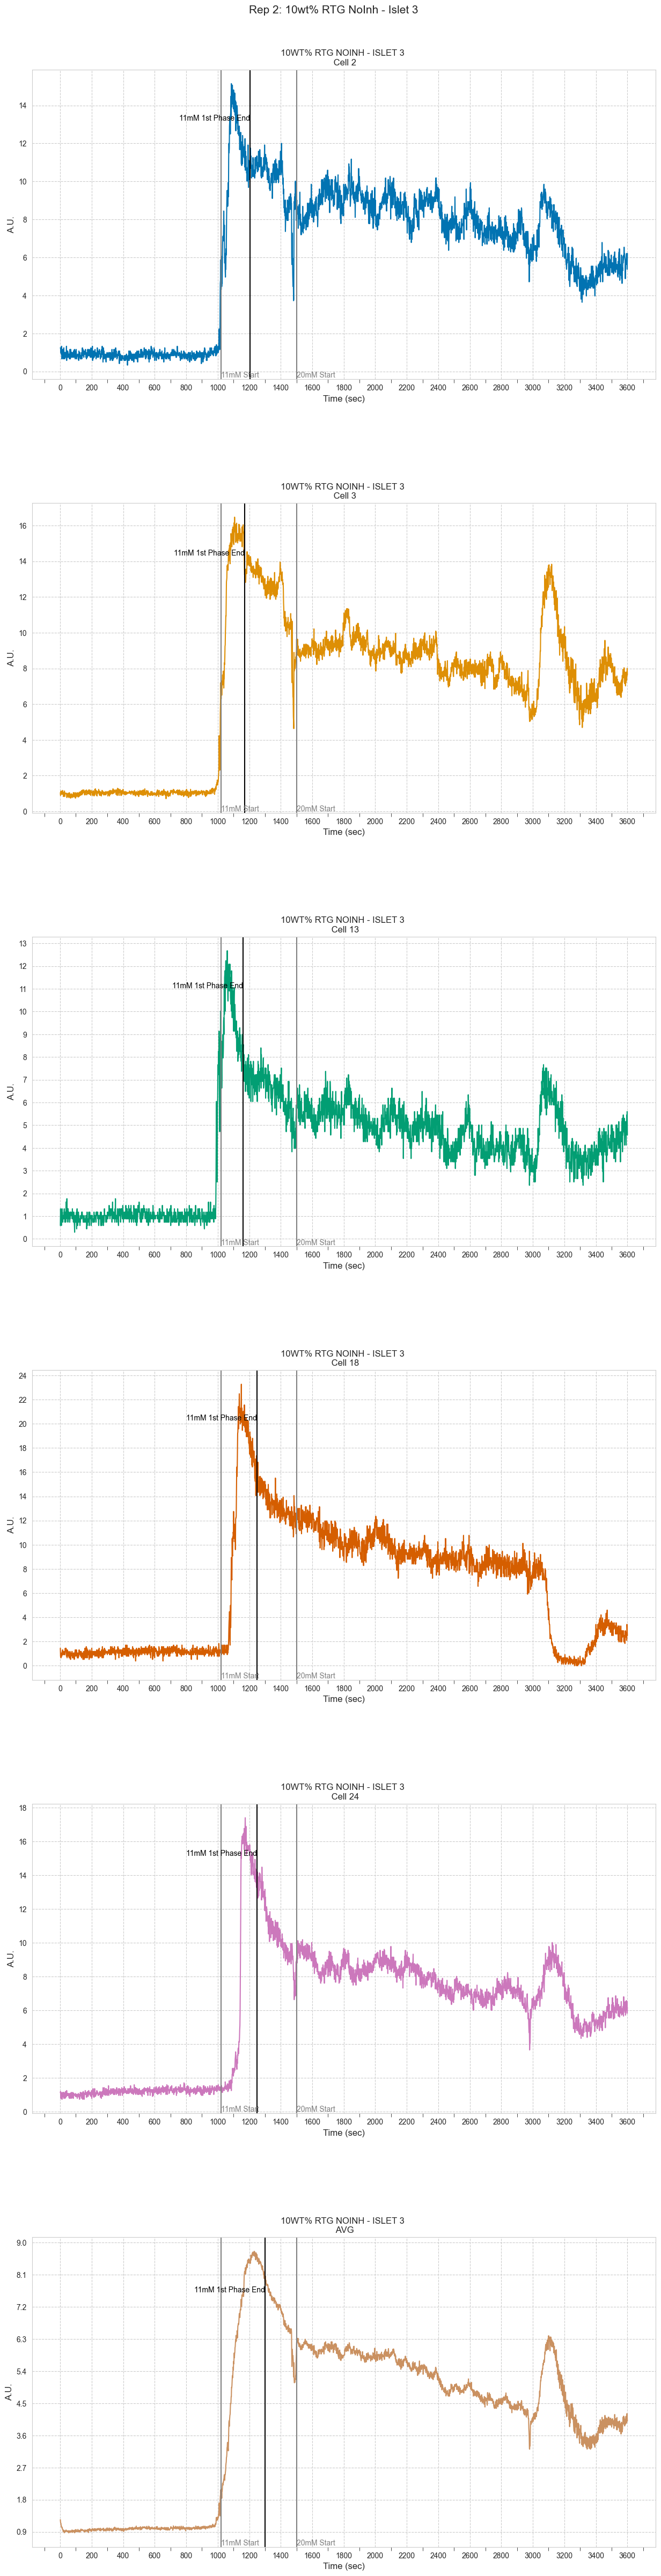

In [13]:
treatments = df.Treatment.unique()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# loop through the length of tickers and keep track of index
for n, treat in enumerate(treatments):

    temp_df = df[df["Treatment"] == treat]
    temp_md = md[md["Treatment"] == treat]

    cells = temp_df["Cell #"].unique()

    #re-iniitialize the color pallet with each new set of plots:
    palette = sns.color_palette("colorblind", len(cells))

    #initialize plot
    plt.figure(figsize=(15, int(10*len(cells))))
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle(f"Rep {rep}: {treat}", fontsize=15, y=0.9)
    print(treat)
    print(cells)
    for m, cell in enumerate(cells):

        cell_md = temp_md[temp_md["Example Cells"] == cell]
        plot_df = temp_df[temp_df["Cell #"] == cell]

        col_num = 1
        ax = plt.subplot(int(math.ceil(len(cells)/col_num)), col_num, m + 1)



        ax.set_xlabel("Time (sec)")
        ax.set_ylabel("A.U.")
        #ax.legend()
        #ax.get_legend().remove()
        #ax.set_xlabel("")

        sns.lineplot(data = plot_df,x = "Time (sec)", y = "Normalized A.U.", color=palette[m])
        # Set more frequent ticks on the x-axis

                    #if there is no metadata
        if len(temp_md) == 0:
            print(f"There is no metadata on {treat} so no starts or ends of curves are unknown")
            continue

        #if we have metadata on the cell
        else:
            # filter df and plot ticker on the new subplot axis
            ax.axvline(x=cell_md["11 mM Stimulus"].iloc[0], color='grey')
            ax.axvline(x=cell_md["11 mM End"].iloc[0], color='black')
            ax.axvline(x=cell_md["20 mM Stimulus"].iloc[0], color='grey')

            # Text labels
            y_pos = ax.get_ylim()[0]  # Position at the bottom of the graph
            ax.text(cell_md["11 mM Stimulus"].iloc[0], y_pos, "11mM Start", color='grey', verticalalignment='bottom')
            ax.text(cell_md["11 mM End"].iloc[0], ax.get_ylim()[1]*.85 , "11mM 1st Phase End", color='black', verticalalignment='top', horizontalalignment='right')
            ax.text(cell_md["20 mM Stimulus"].iloc[0], y_pos, "20mM Start", color='grey', verticalalignment='bottom')

            if pd.notna(cell_md["End 11 mM 2nd Phase"].iloc[0]):
                ax.axvline(x=cell_md["End 11 mM 2nd Phase"].iloc[0], color='black')
                ax.text(cell_md["End 11 mM 2nd Phase"].iloc[0], ax.get_ylim()[1]*1 , "11mM 2nd Phase End", color='black', verticalalignment='top', horizontalalignment='left')


        xspacing = int(round_sig((plot_df["Time (sec)"].max() - plot_df["Time (sec)"].min())/20))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(xspacing))  # Adjust the locator value as needed
        yspacing = round_sig((plot_df["Normalized A.U."].max()/10))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(yspacing))
        ax.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
        ax.tick_params(axis='y', labelsize=10)  # Adjust the font size of x-axis tick labels

        # Enable and enlarge minor ticks for visibility
        ax.minorticks_on()
        # Add minor ticks on the x-axis
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adds 1 minor tick between major ticks
        ax.tick_params(axis='x', which='minor', bottom=True, top=False, length=5)


        ax.set_xlabel("Time (sec)", fontsize=12)
        ax.set_ylabel("A.U.", fontsize=12)
        # chart formatting
        ax.set_title(f"{treat.upper()} \n {cell}")


    plt.savefig(f"{folder}/Seperations/Rep{rep}_{treat}_sep.png", bbox_inches = "tight");






In [14]:
if not os.path.exists(f"{folder}/second_phase"):

    # if the demo_folder directory is not present
    # then create it.

    os.makedirs(f"{folder}/second_phase")

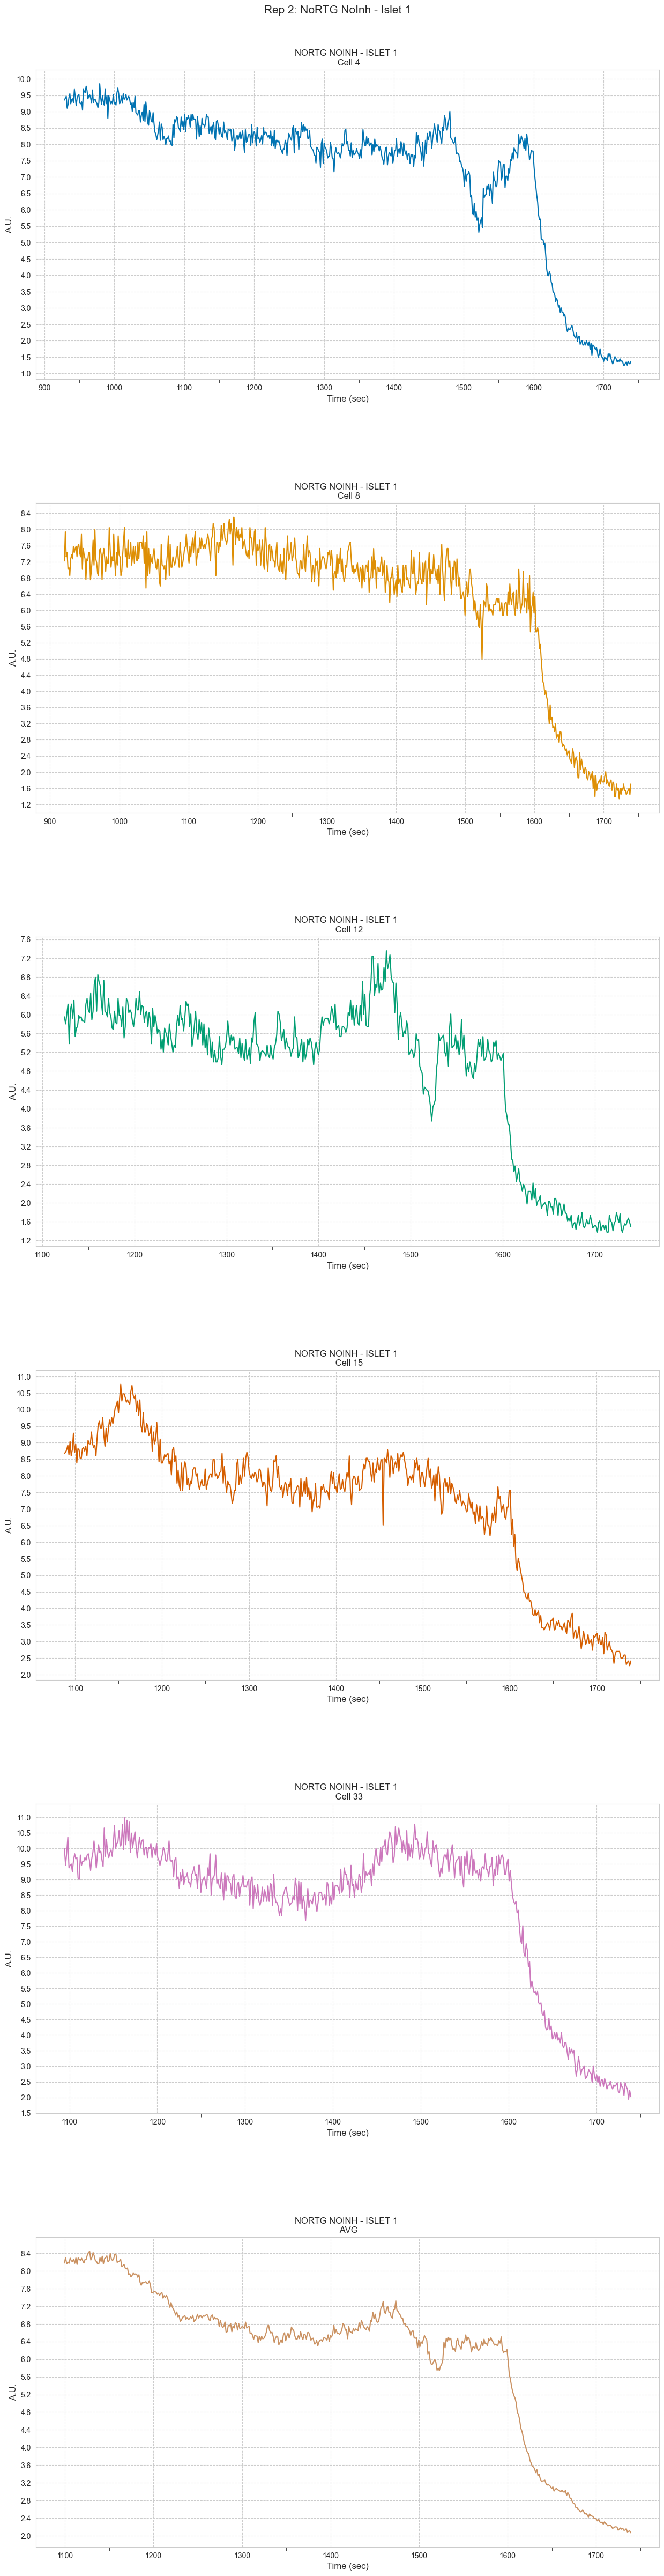

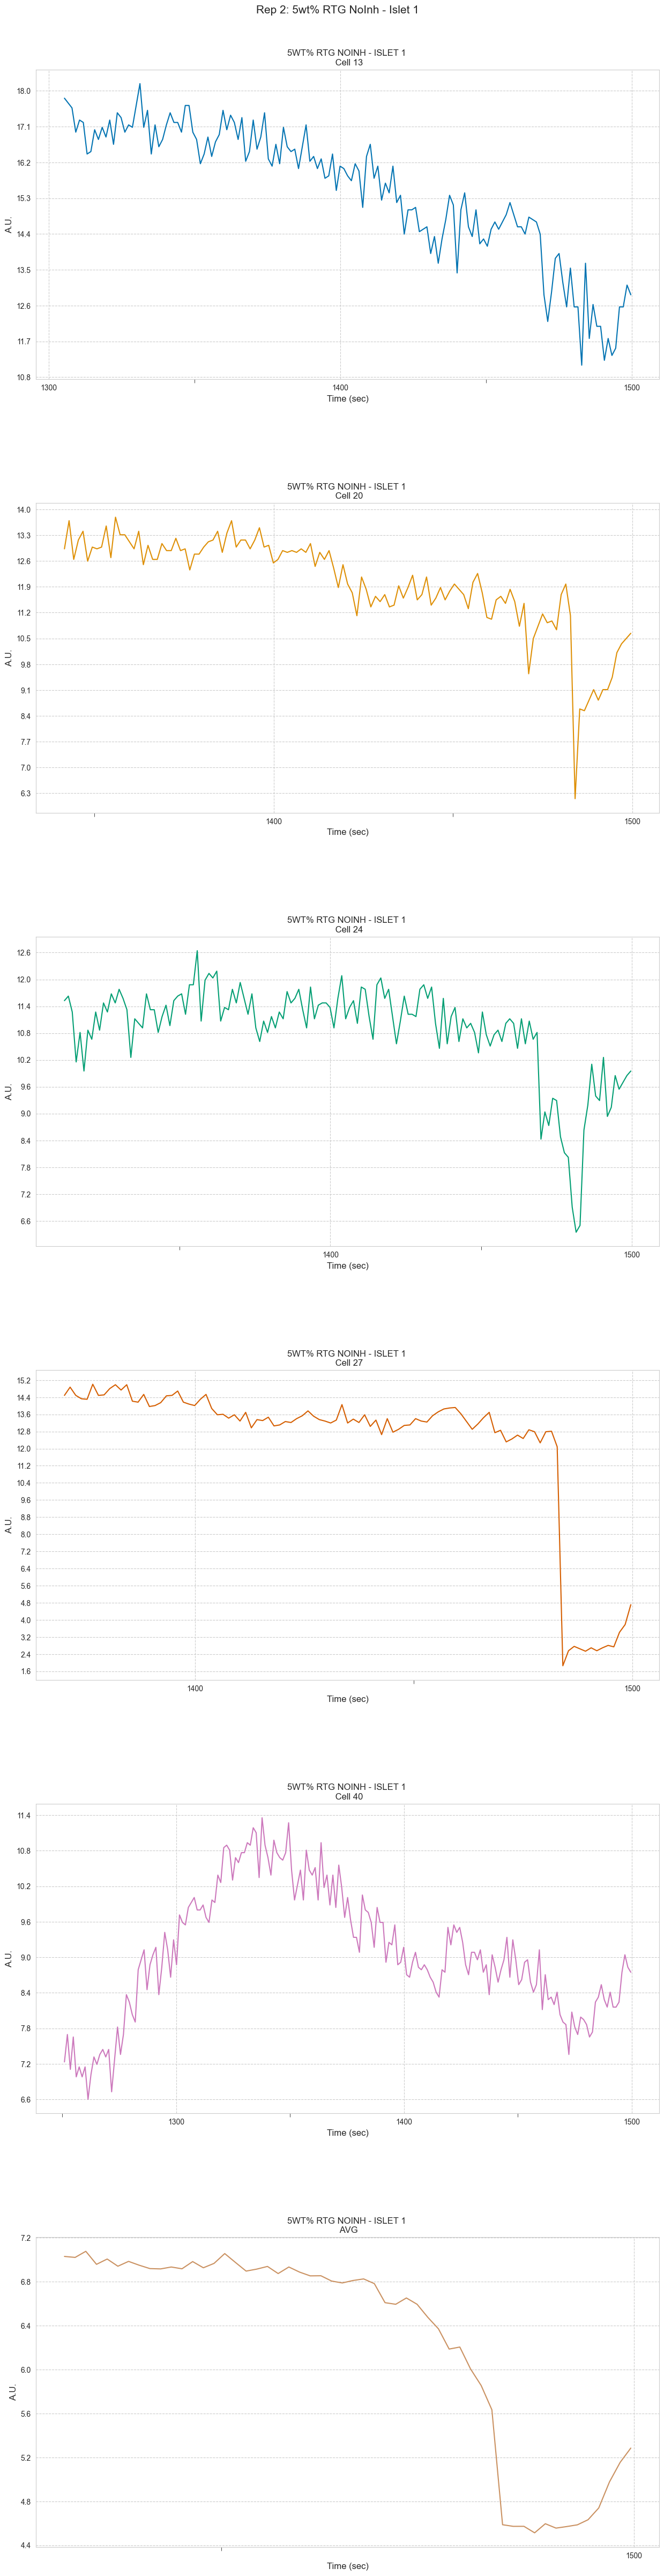

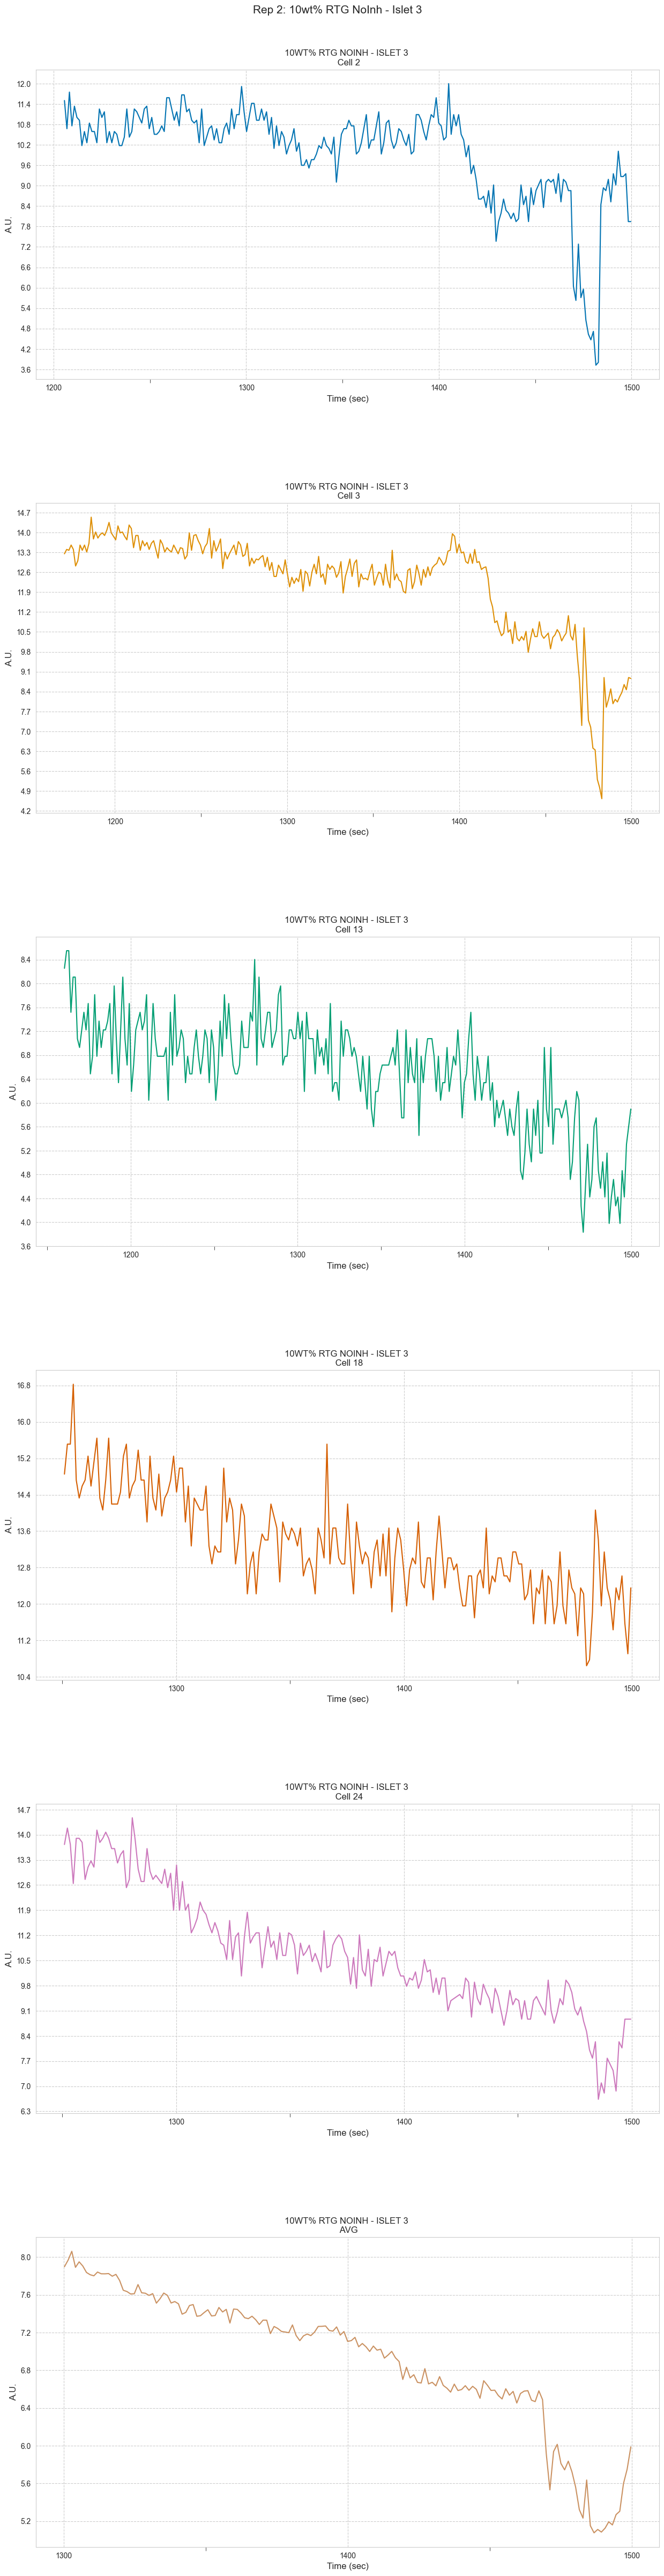

In [15]:
treatments = df.Treatment.unique()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# loop through the length of tickers and keep track of index
for n, treat in enumerate(treatments):

    temp_df = df[df["Treatment"] == treat]
    temp_md = md[md["Treatment"] == treat]

    cells = temp_df["Cell #"].unique()

    #re-iniitialize the color pallet with each new set of plots:
    palette = sns.color_palette("colorblind", len(cells))

    #initialize plot
    plt.figure(figsize=(15, int(10*len(cells))))
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle(f"Rep {rep}: {treat}", fontsize=15, y=0.9)

    for m, cell in enumerate(cells):



        cell_md = temp_md[temp_md["Example Cells"] == cell]

        wind_start = cell_md["11 mM End"].iloc[0]

        wind_end = cell_md["20 mM Stimulus"].iloc[0]


        plot_df = temp_df[temp_df["Cell #"] == cell]
        plot_df = plot_df[plot_df["Time (sec)"].between(wind_start, wind_end)]

        col_num = 1
        ax = plt.subplot(int(math.ceil(len(cells)/col_num)), col_num, m + 1)



        # filter df and plot ticker on the new subplot axis

        ax.set_xlabel("Time (sec)")
        ax.set_ylabel("A.U.")
        #ax.legend()
        #ax.get_legend().remove()
        #ax.set_xlabel("")

        sns.lineplot(data = plot_df,x = "Time (sec)", y = "Normalized A.U.", color=palette[m])
        # Set more frequent ticks on the x-axis

        ax.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust the locator value as needed

        yspacing = round_sig((plot_df["Normalized A.U."].max()/20))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(yspacing))
        ax.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
        ax.tick_params(axis='y', labelsize=10)  # Adjust the font size of x-axis tick labels

        # Enable and enlarge minor ticks for visibility
        ax.minorticks_on()
        # Add minor ticks on the x-axis
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adds 1 minor tick between major ticks
        ax.tick_params(axis='x', which='minor', bottom=True, top=False, length=5)

        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adds 1 minor tick between major ticks
        #ax.tick_params(axis='y', which='minor', bottom=True, top=False, length=5)


        ax.set_xlabel("Time (sec)", fontsize=12)
        ax.set_ylabel("A.U.", fontsize=12)
        # chart formatting
        ax.set_title(f"{treat.upper()} \n {cell}")



    plt.savefig(f"{folder}/second_phase/Rep{rep}_{treat}_sep.png", bbox_inches = "tight");






In [16]:
def smooth(x_vals, window = 5, loops = 5):

    new = np.zeros(len(x_vals))

    for j in range(loops):
        for i in range(len(x_vals)):

            start_window = i - window
            end_window = i + window +1

            if start_window < 0:
                start_window = 0


            new[i] = np.average(x_vals[start_window: end_window])

        x_vals = new

    return x_vals

In [17]:
def find_troffs(time, smoothed_signal):
    """
    Function to find the start indices of peaks (troffs) and inflection points in the given signal.

    Parameters:
    - time: Array of time values.
    - smoothed_signal: Array of smoothed signal values.

    Returns:
    - peak_starts: Indices where peaks start.
    - trough_starts: Indices where troughs start.
    - inflection_points: Indices of inflection points.
    """

    # Calculate the first derivative of the smoothed signal
    derivative = np.diff(smoothed_signal) / np.diff(time)
    derivative = np.concatenate([[0], derivative])  # Adding a zero to align with the length of the signal

    # Identify where the derivative changes sign for peaks and troughs
    peak_start_indices = np.where(np.diff(np.signbit(derivative)))[0]

    # Filter out the peak starts that are actually trough beginnings
    peaks = peak_start_indices[derivative[peak_start_indices] < 0]

    # Filter out the trough starts that are actually peak beginnings
    troughs = peak_start_indices[derivative[peak_start_indices] > 0]

    # Calculate the second derivative for finding inflection points
    # We reduce the size of the time array to match the length of the first derivative before calculating the second derivative
    second_derivative = np.diff(derivative) / np.diff(time)
    second_derivative = np.concatenate([[0, 0], second_derivative])  # Adding zeros to align with the length of the signal

    # Find where the second derivative changes sign (inflection points)
    inflection_points = np.where(np.diff(np.signbit(second_derivative)))[0]

    # Filter out the peak starts that are actually trough beginnings
    peak_starts = inflection_points[derivative[inflection_points] < 0]

    # Filter out the trough starts that are actually peak beginnings
    peak_ends = inflection_points[derivative[inflection_points] > 0]

    return peaks, troughs, peak_starts, peak_ends


In [18]:
def find_troffs(time, smoothed_signal):
    """
    Function to find the start indices of peaks (troffs) and inflection points in the given signal.

    Parameters:
    - time: Array of time values.
    - smoothed_signal: Array of smoothed signal values.

    Returns:
    - peak_starts: Indices where peaks start.
    - trough_starts: Indices where troughs start.
    - inflection_points: Indices of inflection points.
    """

    # Calculate the first derivative of the smoothed signal
    derivative = np.diff(smoothed_signal) / np.diff(time)
    derivative = np.concatenate([[0], derivative])  # Adding a zero to align with the length of the signal

    # Identify where the derivative changes sign for peaks and troughs
    peak_start_indices = np.where(np.diff(np.signbit(derivative)))[0]

    # Filter out the peak starts that are actually trough beginnings
    peaks = peak_start_indices[derivative[peak_start_indices] < 0]

    # Filter out the trough starts that are actually peak beginnings
    troughs = peak_start_indices[derivative[peak_start_indices] > 0]




    return peaks, troughs


In [19]:
import numpy as np



def test_find_troffs(time, smoothed_signal):
    """
    Function to find peaks, troughs, and inflection points in the given signal.

    Parameters:
    - time: Array of time values.
    - smoothed_signal: Array of smoothed signal values.

    Returns:
    - peaks: Indices where peaks are detected.
    - troughs: Indices where troughs are detected.
    - inflection_points: Approximated indices of inflection points between peaks and troughs.
    """

    # Calculate the first derivative of the smoothed signal
    derivative = np.diff(smoothed_signal) / np.diff(time)
    derivative = np.concatenate([[0], derivative])  # Adding a zero to align with the length of the signal

    # Identify where the derivative changes sign for peaks and troughs
    peak_trough_indices = np.where(np.diff(np.signbit(derivative)))[0]

    # Separate peak and trough indices
    peaks = peak_trough_indices[derivative[peak_trough_indices] < 0]
    troughs = peak_trough_indices[derivative[peak_trough_indices] > 0]

    """    # Calculate the second derivative for finding inflection points
    second_derivative = np.diff(derivative) / np.diff(time)
    second_derivative = np.concatenate([[0, 0], second_derivative])  # Adding zeros to align with the length of the signal"""

    start_peak = []
    end_peak = []

    a = peak_trough_indices[0]

    if a in peaks:
        derivs = derivative[0 : a]
        start_peak.append(np.argmax(derivs))

    if a in troughs:
        derivs = derivative[a : -1]
        end_peak.append(np.argmin(derivs))
        start_peak.append(0)

    for i in range(len(peak_trough_indices)-1):

        a = peak_trough_indices[i]

        if a in peaks:
            b = peak_trough_indices[i + 1]
            min_derivs = min(derivative[a : b])

            start_peak.append(derivative.index(min_derivs))

        if a in troughs:
            b = peak_trough_indices[i + 1]
            derivs = derivative[a : b]
            end_peak.append(np.argmax(derivs))

    a = peak_trough_indices[-1]

    if a in peaks:
        derivs = derivative[a : -1]
        start_peak.append(np.argmin(derivs))
        end_peak.append(-1)

    if a in troughs:
        derivs = derivative[a : -1]
        end_peak.append(np.argmax(derivs))


    return peaks, troughs, zip(start_peak, end_peak)


In [20]:
from scipy.signal import find_peaks

def find_troffs_and_peak_ranges(time, smoothed_signal):
    """
    Function to find the start indices of peaks, troughs, and peak ranges in the given signal.

    Parameters:
    - time: Array of time values.
    - smoothed_signal: Array of smoothed signal values.

    Returns:
    - peaks: Indices where peaks are detected.
    - troughs: Indices where troughs are detected.
    - peak_ranges: Nested list with each element being a pair denoting the start and end of each peak.
    """

    # Calculate the first derivative of the smoothed signal
    derivative = np.diff(smoothed_signal) / np.diff(time)
    derivative = np.concatenate([[0], derivative])  # Adding a zero to align with the length of the signal

    # Identify where the derivative changes sign for peaks and troughs
    peak_trough_indices = np.where(np.diff(np.signbit(derivative)))[0]

    # Separate peak and trough indices
    troughs = peak_trough_indices[derivative[peak_trough_indices] < 0]
    peaks = peak_trough_indices[derivative[peak_trough_indices] > 0]


    peak_ranges = []
    thresh = 0.5

    for i, b in enumerate(peak_trough_indices):

        if b in peaks:

            if i == 0:
                a = 0
            else:
                a = peak_trough_indices[i-1]



            delta_au = smoothed_signal.iloc[b] - smoothed_signal.iloc[a]

            half = smoothed_signal.iloc[a] + (1-thresh)*delta_au

            """            best_start = a
            for i in range(a, b):
                if smoothed_signal.iloc[i] == half:
                    best_start = i
                    break
                elif smoothed_signal.iloc[best_start] > half and smoothed_signal.iloc[i] < half:
                    break
                elif smoothed_signal.iloc[best_start] < half and smoothed_signal.iloc[i] > half:
                    break"""

            closest_start_index = min(enumerate(smoothed_signal.iloc[a:b]), key=lambda x: abs(x[1] - half))[0] + a


            if i >= (len(peak_trough_indices) -1):
                c = len(smoothed_signal)-1
            else:
                c = peak_trough_indices[i + 1]

            delta_au = smoothed_signal.iloc[c] - smoothed_signal.iloc[b]
            half = smoothed_signal.iloc[b] + thresh*delta_au

            closest_end_index = min(enumerate(smoothed_signal.iloc[b:c]), key=lambda x: abs(x[1] - half))[0] + b
            """            best_end = b
            for i in range(b, c):
                if smoothed_signal.iloc[i] == half:
                    best_end = i
                    break
                elif smoothed_signal.iloc[best_end] > half and smoothed_signal.iloc[i] < half:
                    break
                elif smoothed_signal.iloc[best_end] < half and smoothed_signal.iloc[i] > half:
                    break"""

            peak_ranges.append([closest_start_index, closest_end_index])



    return peaks, troughs, peak_ranges

# To use this function, provide the time array and the smoothed signal array
# Example usage: peaks, troughs, peak_ranges = find_troffs_and_peak_ranges(time, smoothed_signal)


In [21]:
md

Treatment  11 mM Stimulus  20 mM Stimulus  \
0        NoRTG NoInh - Islet 1             480            1740   
1        NoRTG NoInh - Islet 1             480            1740   
2        NoRTG NoInh - Islet 1             480            1740   
3        NoRTG NoInh - Islet 1             480            1740   
4        NoRTG NoInh - Islet 1             480            1740   
..                         ...             ...             ...   
260  10wt% RTG NoInh - Islet 3            1020            1500   
261  10wt% RTG NoInh - Islet 3            1020            1500   
262  10wt% RTG NoInh - Islet 3            1020            1500   
263  10wt% RTG NoInh - Islet 3            1020            1500   
264  10wt% RTG NoInh - Islet 3            1020            1500   

     End 11 mM 2nd Phase  KCL Stimulus  11 mM End  End Option 1  End Option 2  \
0                    NaN          2700   1159.025      1159.025      1521.625   
1                    NaN          2700   1095.570      1095.570      1375.290   
2                    NaN          2700   1214.710      1214.710      1516.445   
3                    NaN          2700    928.515       928.515      1522.920   
4                    NaN          2700    980.315       980.315      1517.740   
..                   ...           ...        ...           ...           ...   
260                  NaN          2940   1385.650      1055.425      1385.650   
261                  NaN          2940   1370.110      1114.995      1370.110   
262                  NaN          2940   1380.000      1108.520           NaN   
263                  NaN          2940   1300.000           NaN           NaN   
264                  NaN          2940   1300.000           NaN           NaN   

     End Option 3  Represent Example Cells  Quality   Notes  \
0        1699.040      False        Cell 1        2     NaN   
1        1517.740      False        Cell 2        1     NaN   
2        1714.580      False        Cell 3        1     NaN   
3        1736.595       True        Cell 4        1  custom   
4        1705.515      False        Cell 5        1     NaN   
..            ...        ...           ...      ...     ...   
260           NaN      False       Cell 27        3     150   
261           NaN      False       Cell 28        3      95   
262           NaN      False       Cell 29        2  custom   
263           NaN      False      Cell Avg        3     NaN   
264           NaN       True           AVG        3     NaN   

    Send to Farnsworth  Unnamed: 14 Unnamed: 15 Unnamed: 16  Unnamed: 17  \
0                  NaN          NaN         NaN         NaN          NaN   
1                  NaN          NaN         NaN         NaN          NaN   
2                  NaN          NaN         NaN         NaN          NaN   
3                  NaN          NaN         NaN         NaN          NaN   
4                  NaN          NaN        True         NaN          NaN   
..                 ...          ...         ...         ...          ...   
260                NaN          NaN         NaN         NaN          NaN   
261                NaN          NaN         NaN         NaN          NaN   
262                NaN          NaN         NaN         NaN          NaN   
263                NaN          NaN         NaN         NaN          NaN   
264                NaN          NaN         NaN         NaN          NaN   

     Unnamed: 18  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
260          NaN  
261          NaN  
262          NaN  
263          NaN  
264          NaN  

[265 rows x 19 columns]

In [22]:
if not os.path.exists(f"{folder}/on_off_periods_phase2"):

    # if the demo_folder directory is not present
    # then create it.

    os.makedirs(f"{folder}/on_off_periods_phase2")



/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/1632883067.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  examp.at[cell_md.index[0], "Duty Ratio"] = ratio
/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/1632883067.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  examp.at[cell_md.index[0], "Avg On (sec)"] = avg_on_time


ratio of NoRTG NoInh - Islet 1 Cell 4  0.49041533546326044
ratio of NoRTG NoInh - Islet 1 Cell 8  0.48734177215189917
ratio of NoRTG NoInh - Islet 1 Cell 12  0.47789473684210565
ratio of NoRTG NoInh - Islet 1 Cell 15  0.45924453280318195
ratio of NoRTG NoInh - Islet 1 Cell 33  0.4819277108433726
ratio of NoRTG NoInh - Islet 1 AVG  0.4291497975708509
ratio of 5wt% RTG NoInh - Islet 1 Cell 13  0.41333333333333167
ratio of 5wt% RTG NoInh - Islet 1 Cell 20  0.47540983606557663
ratio of 5wt% RTG NoInh - Islet 1 Cell 24  0.42068965517241136
ratio of 5wt% RTG NoInh - Islet 1 Cell 27  0.4399999999999965
ratio of 5wt% RTG NoInh - Islet 1 Cell 40  0.4687500000000023
ratio of 5wt% RTG NoInh - Islet 1 AVG  0.5094339622641509
ratio of 10wt% RTG NoInh - Islet 3 Cell 2  0.48458149779735643
ratio of 10wt% RTG NoInh - Islet 3 Cell 3  0.4921259842519678
ratio of 10wt% RTG NoInh - Islet 3 Cell 13  0.4923664122137418
ratio of 10wt% RTG NoInh - Islet 3 Cell 18  0.48958333333333837
ratio of 10wt% RTG NoInh 

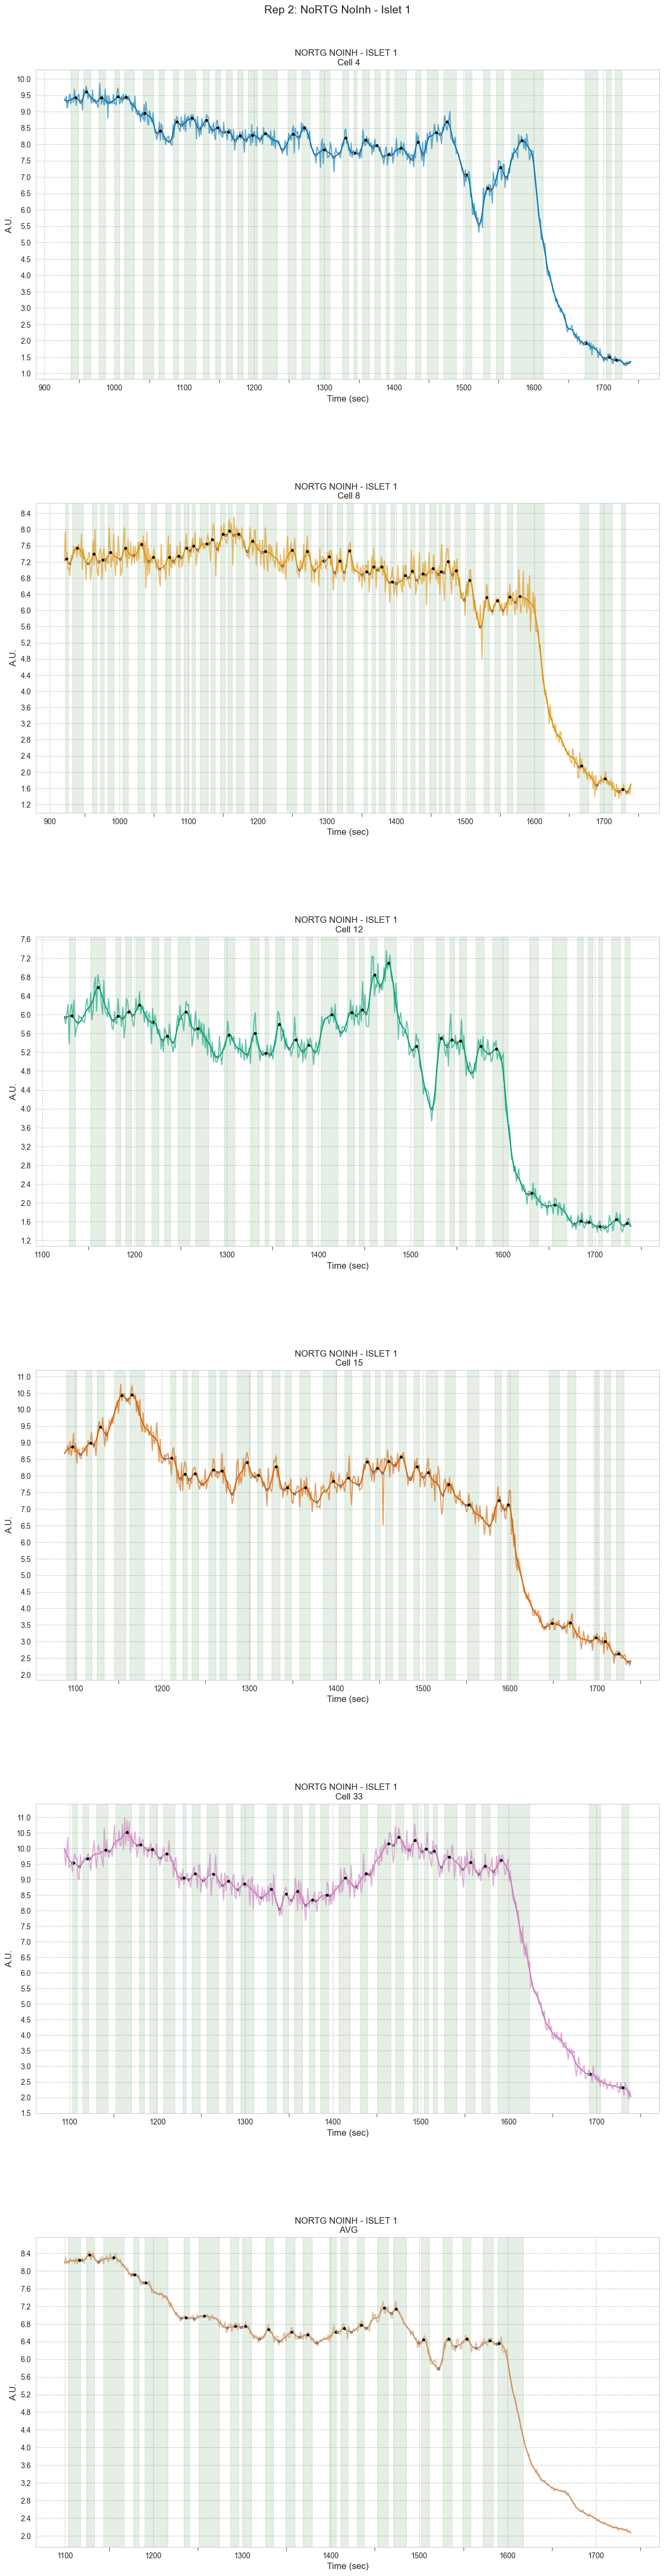

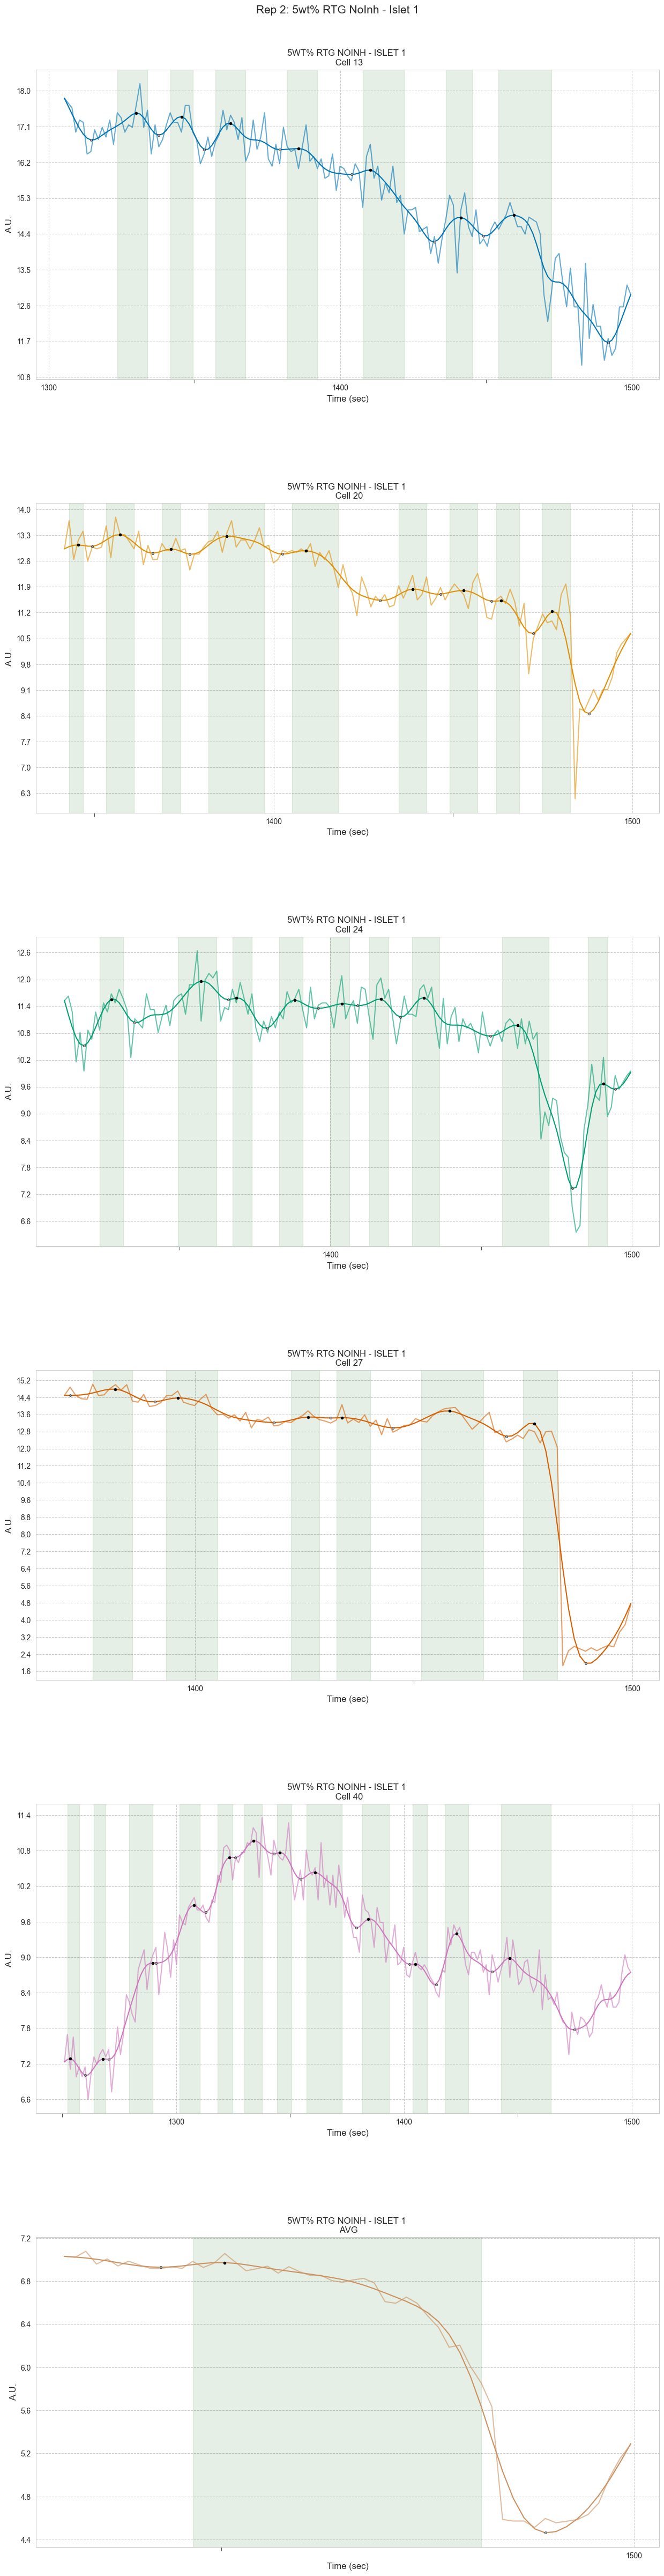

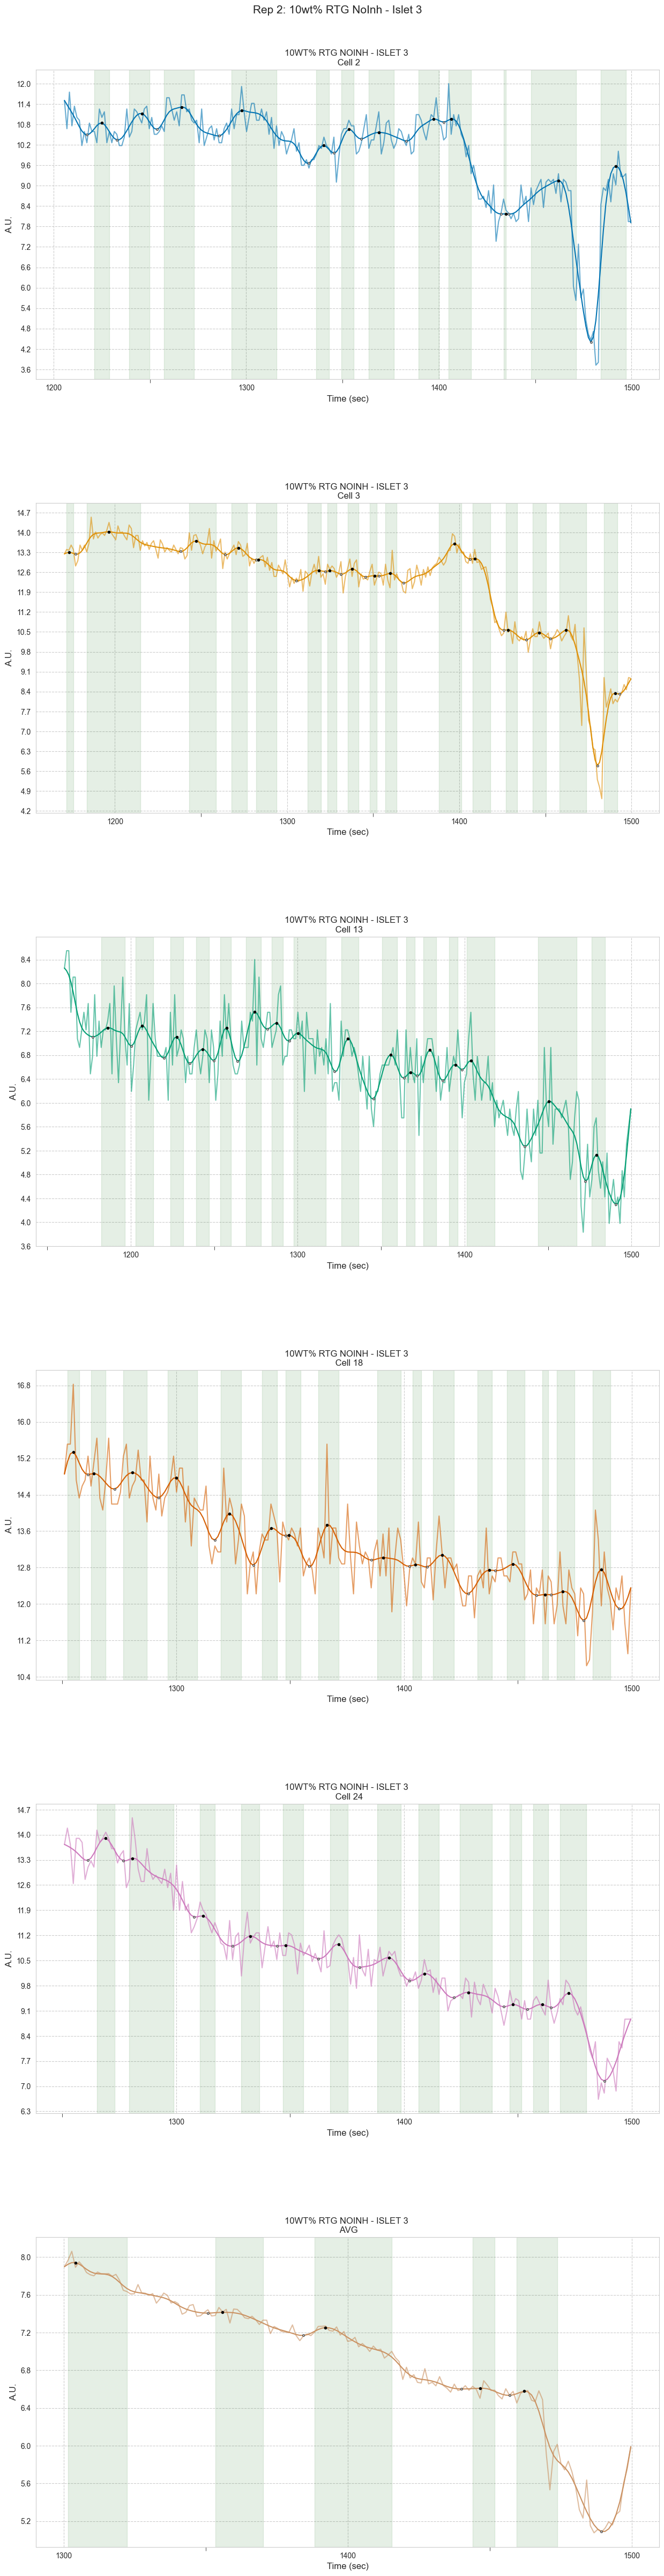

In [23]:
treatments = df.Treatment.unique()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# loop through the length of tickers and keep track of index
for n, treat in enumerate(treatments):

    temp_df = df[df["Treatment"] == treat]
    temp_md = md[md["Treatment"] == treat]

    cells = temp_df["Cell #"].unique()

    #re-iniitialize the color pallet with each new set of plots:
    palette = sns.color_palette("colorblind", len(cells))

    #initialize plot
    plt.figure(figsize=(15, int(10*len(cells))))
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle(f"Rep {rep}: {treat}", fontsize=15, y=0.9)

    for m, cell in enumerate(cells):



        cell_md = temp_md[temp_md["Example Cells"] == cell]

        wind_start = cell_md["11 mM End"].iloc[0]
        wind_end = cell_md["20 mM Stimulus"].iloc[0]



        plot_df = temp_df[temp_df["Cell #"] == cell]
        plot_df = plot_df[plot_df["Time (sec)"].between(wind_start, wind_end)]

        col_num = 1
        ax = plt.subplot(int(math.ceil(len(cells)/col_num)), col_num, m + 1)
        #ax = plt.gca()
        # filter df and plot ticker on the new subplot axis

        ax.set_xlabel("Time (sec)")
        ax.set_ylabel("A.U.")
        #ax.legend()
        #ax.get_legend().remove()
        #ax.set_xlabel("")

        #sns.lineplot(data = plot_df,x = "Time (sec)", y = "Normalized A.U.", color=palette[m], alpha = 0.75)
        # Set more frequent ticks on the x-axis
        au_change = plot_df["Normalized A.U."].max() - plot_df["Normalized A.U."].min()
        time_change = plot_df["Time (sec)"].max() - plot_df["Time (sec)"].min()


        window = 4
        loops = 3


        #smooth_vals = smooth(plot_df["Normalized A.U."], window, loops)
        #plot_df.insert(2, "Smoothed Normalized A.U.", smooth_vals ,True)
        #sns.lineplot(data = plot_df,x = "Time (sec)", y = "Smoothed Normalized A.U.", color=palette[m])

        """        fs = 100
        sos = scipy.signal.iirfilter(1, Wn=[10, 15], fs=fs, btype="bandpass",
                             ftype="butter", output="sos")
        yfilt = scipy.signal.sosfilt(sos, plot_df["Normalized A.U."])
        plot_df["Smoothed Normalized A.U."] =  yfilt + 5
        peaks, props = scipy.signal.find_peaks(yfilt, distance=0.35*fs, height=0.0)"""

        mode = "medium"
        #sns.lineplot(data = plot_df,x = "Time (sec)", y = "Smoothed Normalized A.U.", color=palette[m])

        if mode == "detailed":
            # Designing a Butterworth IIR filter for smoothing
            order = 3  # Filter order
            #note: adjust cutoff_freq to adjust smoothing
            cutoff_freq = 0.3  # Cutoff frequency, needs to be fine-tuned based on the data
            # Using a Butterworth low-pass filter

        if mode == "medium":
            # Designing a Butterworth IIR filter for smoothing
            order = 3  # Filter order
            #note: adjust cutoff_freq to adjust smoothing
            cutoff_freq = 0.2  # Cutoff frequency, needs to be fine-tuned based on the data
            # Using a Butterworth low-pass filter

        if mode == "smooth":
            #smoothest reasonable settings:
            order = 4  # Filter order
            cutoff_freq = 0.06
        if len(plot_df["Normalized A.U."]) < 12:
            print(cell, treat)
            print(plot_df["Normalized A.U."])
            continue

        b, a = scipy.signal.iirfilter(N=order, Wn=cutoff_freq, btype='low', ftype='butter')
        # Applying the filter to the Cell 1 data
        smoothed_AU = scipy.signal.filtfilt(b, a, plot_df["Normalized A.U."])
        plot_df.insert(2, "Smoothed Normalized A.U.", smoothed_AU ,True)

        yspacing = round_sig((plot_df["Normalized A.U."].max()/20))


        #sns.lineplot(data = plot_df,x = "Time (sec)", y = "Smoothed Normalized A.U.", color=palette[m])

        """      cwt_peaks = scipy.signal.find_peaks_cwt(plot_df["Normalized A.U."], widths=np.arange(3, 30))
        print(cwt_peaks)
        peaks = []

        for peak in cwt_peaks:
            peaks.append(plot_df["Time (sec)"].iloc[peak])

            ax.plot(plot_df["Time (sec)"].iloc[peak], plot_df["Normalized A.U."].iloc[peak], marker=".", color="black", markersize=5)"""

        peaks, troughs, ons = find_troffs_and_peak_ranges(plot_df["Time (sec)"], plot_df["Smoothed Normalized A.U."])


        on_time = 0
        for spread in ons:
            start = plot_df["Time (sec)"].iloc[spread[0]]
            end = plot_df["Time (sec)"].iloc[spread[1]]
            ax.axvspan(start, end, alpha=0.1, color='darkgreen')
            on_time += end - start

        time_span =(max(plot_df["Time (sec)"]) - min(plot_df["Time (sec)"]))
        ratio = on_time/ time_span
        avg_on_time = on_time / len(ons)

        examp.at[cell_md.index[0], "Duty Ratio"] = ratio
        examp.at[cell_md.index[0], "Avg On (sec)"] = avg_on_time

        print(f"ratio of {treat} {cell} ",  ratio)

        """"
        for i, start in enumerate(peak_starts):

            start = plot_df["Time (sec)"].iloc[start]
            print("start " , start)

            if len(peak_ends) >= i:
                end = peak_ends[i]
                end = plot_df["Time (sec)"].iloc[end]
            else:
                end = plot_df["Time (sec)"].max()
                #print("end " , end)

            ax.axvspan(start, end, alpha=0.5, color='green')
        """


        sns.lineplot(data = plot_df,x = "Time (sec)", y = "Normalized A.U.", color=palette[m], alpha = 0.6)
        sns.lineplot(data = plot_df,x = "Time (sec)", y = "Smoothed Normalized A.U.", color=palette[m], alpha = 1)

        for peak in peaks:
            ax.plot(plot_df["Time (sec)"].iloc[peak], plot_df["Smoothed Normalized A.U."].iloc[peak], marker="o", color="black", markersize=3)
        for trough in troughs:
            ax.plot(plot_df["Time (sec)"].iloc[trough], plot_df["Smoothed Normalized A.U."].iloc[trough], marker="o", color="darkgrey", markersize=3,
                    markeredgewidth=0.4, markeredgecolor="black")


        ax.xaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust the locator value as needed


        ax.yaxis.set_major_locator(ticker.MultipleLocator(yspacing))
        ax.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
        ax.tick_params(axis='y', labelsize=10)  # Adjust the font size of x-axis tick labels

        # Enable and enlarge minor ticks for visibility
        ax.minorticks_on()
        # Add minor ticks on the x-axis
        ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adds 1 minor tick between major ticks
        ax.tick_params(axis='x', which='minor', bottom=True, top=False, length=5)

        ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Adds 1 minor tick between major ticks
        #ax.tick_params(axis='y', which='minor', bottom=True, top=False, length=5)


        ax.set_xlabel("Time (sec)", fontsize=12)
        ax.set_ylabel("A.U.", fontsize=12)
        # chart formatting
        ax.set_title(f"{treat.upper()} \n {cell}")



    plt.savefig(f"{folder}/on_off_periods_phase2/Rep{rep}_{treat}_graphs.png", bbox_inches = "tight");






In [24]:
examp

Treatment  11 mM Stimulus  20 mM Stimulus  \
3        NoRTG NoInh - Islet 1             480            1740   
7        NoRTG NoInh - Islet 1             480            1740   
11       NoRTG NoInh - Islet 1             480            1740   
14       NoRTG NoInh - Islet 1             480            1740   
32       NoRTG NoInh - Islet 1             480            1740   
34       NoRTG NoInh - Islet 1             480            1740   
79    5wt% RTG NoInh - Islet 1            1020            1500   
86    5wt% RTG NoInh - Islet 1            1020            1500   
90    5wt% RTG NoInh - Islet 1            1020            1500   
93    5wt% RTG NoInh - Islet 1            1020            1500   
106   5wt% RTG NoInh - Islet 1            1020            1500   
115   5wt% RTG NoInh - Islet 1            1020            1500   
235  10wt% RTG NoInh - Islet 3            1020            1500   
236  10wt% RTG NoInh - Islet 3            1020            1500   
246  10wt% RTG NoInh - Islet 3            1020            1500   
251  10wt% RTG NoInh - Islet 3            1020            1500   
257  10wt% RTG NoInh - Islet 3            1020            1500   
264  10wt% RTG NoInh - Islet 3            1020            1500   

     End 11 mM 2nd Phase  KCL Stimulus  11 mM End  End Option 1  End Option 2  \
3                    NaN          2700    928.515       928.515      1522.920   
7                    NaN          2700    920.745       920.745      1059.310   
11                   NaN          2700   1122.765      1122.765      1348.095   
14                   NaN          2700   1087.800      1087.800      1261.330   
32                   NaN          2700   1094.275      1094.275      1363.635   
34                   NaN          2700   1099.455      1099.455      1364.930   
79                   NaN          2940   1305.360      1090.390      1305.360   
86                   NaN          2940   1340.325      1102.045      1340.325   
90                   NaN          2940   1311.835      1074.850      1311.835   
93                   NaN          2940   1370.000      1091.685      1363.635   
106                  NaN          2940   1250.970      1250.970           NaN   
115                  NaN          2940   1430.000           NaN           NaN   
235                  NaN          2940   1205.645      1205.645      1336.440   
236                  NaN          2940   1170.000      1326.080           NaN   
246                  NaN          2940   1160.000      1221.185           NaN   
251                  NaN          2940   1250.000      1026.935           NaN   
257                  NaN          2940   1250.000      1069.670           NaN   
264                  NaN          2940   1300.000           NaN           NaN   

     End Option 3  Represent  ... Quality   Notes Send to Farnsworth  \
3        1736.595       True  ...       1  custom                NaN   
7        1394.715       True  ...       1     NaN                NaN   
11       1701.630       True  ...       1     NaN                NaN   
14       1373.995       True  ...       1     NaN                NaN   
32            NaN       True  ...       1     NaN                NaN   
34       1526.805       True  ...       2  Custom                NaN   
79            NaN       True  ...       1     NaN                NaN   
86            NaN       True  ...       1     NaN                NaN   
90            NaN       True  ...       1     NaN                NaN   
93            NaN       True  ...       1     NaN                NaN   
106           NaN       True  ...       1     NaN                NaN   
115           NaN       True  ...       3     NaN                NaN   
235           NaN       True  ...       1     NaN                NaN   
236           NaN       True  ...       1  custom                NaN   
246           NaN       True  ...       1  custom                NaN   
251           NaN       True  ...       1     NaN                NaN   
25

In [25]:
graph_df = examp.copy()
graph_df["Treatment"] = graph_df["Treatment"].str.split("-", expand=True)[0]
graph_df

Treatment  11 mM Stimulus  20 mM Stimulus  End 11 mM 2nd Phase  \
3        NoRTG NoInh              480            1740                  NaN   
7        NoRTG NoInh              480            1740                  NaN   
11       NoRTG NoInh              480            1740                  NaN   
14       NoRTG NoInh              480            1740                  NaN   
32       NoRTG NoInh              480            1740                  NaN   
34       NoRTG NoInh              480            1740                  NaN   
79    5wt% RTG NoInh             1020            1500                  NaN   
86    5wt% RTG NoInh             1020            1500                  NaN   
90    5wt% RTG NoInh             1020            1500                  NaN   
93    5wt% RTG NoInh             1020            1500                  NaN   
106   5wt% RTG NoInh             1020            1500                  NaN   
115   5wt% RTG NoInh             1020            1500                  NaN   
235  10wt% RTG NoInh             1020            1500                  NaN   
236  10wt% RTG NoInh             1020            1500                  NaN   
246  10wt% RTG NoInh             1020            1500                  NaN   
251  10wt% RTG NoInh             1020            1500                  NaN   
257  10wt% RTG NoInh             1020            1500                  NaN   
264  10wt% RTG NoInh             1020            1500                  NaN   

     KCL Stimulus  11 mM End  End Option 1  End Option 2  End Option 3  \
3            2700    928.515       928.515      1522.920      1736.595   
7            2700    920.745       920.745      1059.310      1394.715   
11           2700   1122.765      1122.765      1348.095      1701.630   
14           2700   1087.800      1087.800      1261.330      1373.995   
32           2700   1094.275      1094.275      1363.635           NaN   
34           2700   1099.455      1099.455      1364.930      1526.805   
79           2940   1305.360      1090.390      1305.360           NaN   
86           2940   1340.325      1102.045      1340.325           NaN   
90           2940   1311.835      1074.850      1311.835           NaN   
93           2940   1370.000      1091.685      1363.635           NaN   
106          2940   1250.970      1250.970           NaN           NaN   
115          2940   1430.000           NaN           NaN           NaN   
235          2940   1205.645      1205.645      1336.440           NaN   
236          2940   1170.000      1326.080           NaN           NaN   
246          2940   1160.000      1221.185           NaN           NaN   
251          2940   1250.000      1026.935           NaN           NaN   
257          2940   1250.000      1069.670           NaN           NaN   
264          2940   1300.000           NaN           NaN           NaN   

     Represent  ... Quality   Notes Send to Farnsworth Unnamed: 14  \
3         True  ...       1  custom                NaN         NaN   
7         True  ...       1     NaN                NaN         NaN   
11        True  ...       1     NaN                NaN         NaN   
14        True  ...       1     NaN                NaN         NaN   
32        True  ...       1     NaN                NaN         NaN   
34        True  ...       2  Custom                NaN         NaN   
79        True  ...       1     NaN                NaN         NaN   
86        True  ...       1     NaN                NaN         NaN   
90        True  ...       1     NaN                NaN         NaN   
93        True  ...       1     NaN                NaN         NaN   
106       True  ...       1     NaN                NaN         NaN   
115       True  ...       3     NaN                NaN         NaN   
235       True  ...       1     NaN                NaN         NaN   
236       True  ...       1  custom                NaN         NaN   
246       True  ...       1  custom                NaN         NaN   
25

In [26]:
if not os.path.exists(f'{folder}/graphs'): 
      
     # if the demo_folder directory is not present then create it
                        
    os.makedirs(f'{folder}/graphs')

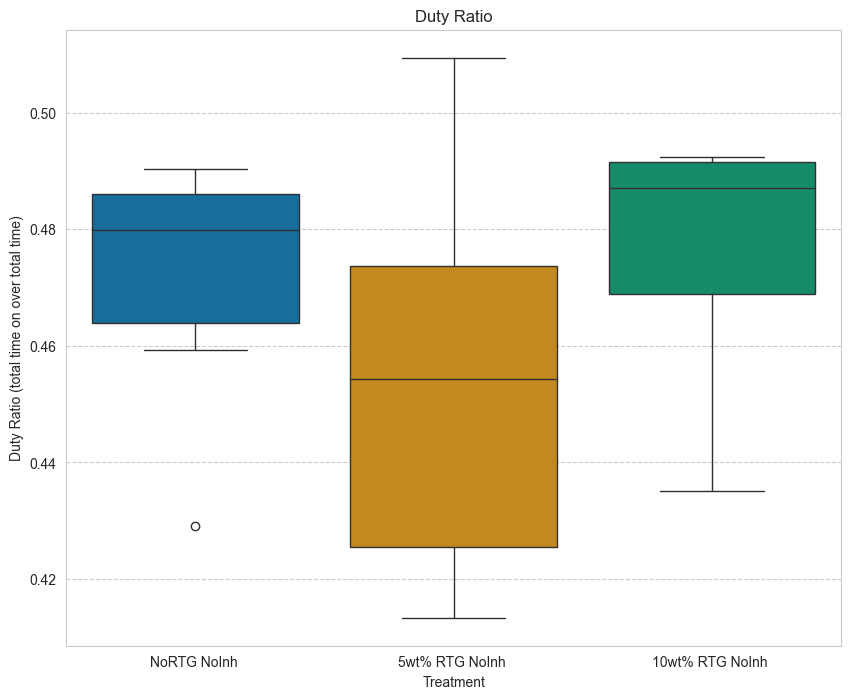

In [27]:
colors = sns.color_palette('colorblind', n_colors=len(graph_df["Treatment"].unique()))

plt.figure(figsize=(10, 8))
#sns.barplot(graph_df, x="Treatment", y="Duty Ratio", hue="Treatment", palette = colors)
sns.boxplot(graph_df, x="Treatment", y="Duty Ratio", hue="Treatment", palette = colors)
#sns.swarmplot(graph_df, x="Treatment", y="Duty Ratio", hue="Treatment", palette = colors)

plt.title("Duty Ratio", fontsize = 12)
plt.ylabel("Duty Ratio (total time on over total time)");

Text(0, 0.5, 'Average On Time (sec)')

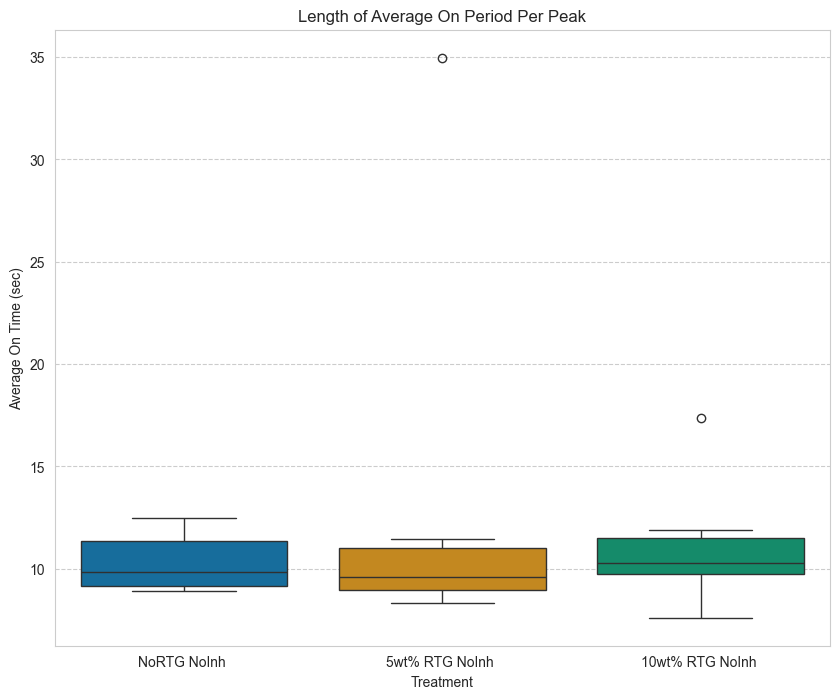

In [28]:
colors = sns.color_palette('colorblind', n_colors=len(graph_df["Treatment"].unique()))

plt.figure(figsize=(10, 8))
#sns.barplot(graph_df, x="Treatment", y="Avg On (sec)", hue="Treatment", palette = colors)
sns.boxplot(graph_df, x="Treatment", y="Avg On (sec)", hue="Treatment", palette = colors)

plt.title("Length of Average On Period Per Peak", fontsize = 12)
plt.ylabel("Average On Time (sec)")


In [29]:
def AUC(md_df, data, start = "11 mM Stimulus", end = "11 mM End", style="Trap", normal = False):
    # Initialize a list to store AUC values for each row in md_df but only works rn with only one typle of cell in each catagory
    AUCs = []

    # Iterate over each row in md_df
    for i, row in md_df.iterrows():
        # Filter 'data' dataframe to include only rows where 'Treatment' matches the current row in md_df
        min_df = data[(data["Treatment"] == row["Treatment"]) & (data["Cell #"] == row["Example Cells"])]
        # Further filter 'min_df' to include only rows where 'Time (sec)' is between 'Start' and 'End' of the current row in md_df
        min_df = min_df[min_df["Time (sec)"].between(row[start], row[end])]
                # Check if min_df is empty

        if min_df.empty:

            AUCs.append(np.nan)  # Append NaN or some other placeholder
            continue
        # Extract 'Time (sec)' column as x-values
        x = min_df["Time (sec)"].values

        if normal == False:
            # Calculate y-values by subtracting the baseline (first value) from 'Normalized A.U.'
            y = min_df['Normalized A.U.'] - min_df['Normalized A.U.'].iloc[0]
            print(y)
        if normal == True:
            y = min_df['Normalized A.U.']/min_df['Normalized A.U.'].iloc[0]




        # Choose the method to calculate AUC based on the 'type' parameter
        if style.lower() == "trap":
            # Calculate the AUC using the trapezoidal rule
            AUC_value = np.trapz(y, x)
        elif style.lower() == "rect":
            # Calculate the AUC using the rectangular method
            y = y.values
            AUC_value = 0
            for i in range(1, len(y)):
                # Calculate the width of each rectangle (delta_x)
                delta_x = (x[i] - x[i-1])
                # Height of the rectangle (delta_y)
                delta_y = y[i-1]
                # Incrementally add the area of each rectangle to 'AUC_value'
                AUC_value += delta_x * delta_y

        # Append the calculated AUC to the AUCs list
        AUCs.append(AUC_value)

    if style == "rect":
        md_df["AUC (rect)"] = AUCs
        return md_df

    # Add a new column 'AUC' to md_df containing the calculated AUCs
    md_df["AUC (trap)"] = AUCs
    # Return the modified md_df with AUC values
    return md_df


In [30]:
examp = AUC(examp.copy(), df.copy(), style="rect", normal = False)
examp = AUC(examp.copy(), df.copy(), style="trap")


7222    0.000000
7223    0.000000
7224    0.038189
7225    0.000000
7226    0.019095
          ...   
7564    8.469356
7565    8.565445
7566    8.796427
7567    8.565445
7568    8.526948
Name: Normalized A.U., Length: 347, dtype: float64
16358    0.000000
16359   -0.257660
16360   -0.103064
16361   -0.464253
16362   -0.515785
           ...   
16694    5.623027
16695    5.777623
16696    6.087279
16697    5.932219
16698    6.087279
Name: Normalized A.U., Length: 341, dtype: float64
25494    0.000000
25495   -0.029879
25496   -0.089906
25497   -0.060027
25498   -0.209421
           ...   
25986    4.964738
25987    4.875101
25988    4.456258
25989    4.904980
25990    4.755316
Name: Normalized A.U., Length: 497, dtype: float64
32346    0.000000
32347    0.000000
32348    0.035853
32349    0.179698
32350    0.000000
           ...   
32810    8.027214
32811    8.459179
32812    7.847084
32813    7.991361
32814    8.279050
Name: Normalized A.U., Length: 469, dtype: float64
73458    0.0000

In [31]:
examp

Treatment  11 mM Stimulus  20 mM Stimulus  \
3        NoRTG NoInh - Islet 1             480            1740   
7        NoRTG NoInh - Islet 1             480            1740   
11       NoRTG NoInh - Islet 1             480            1740   
14       NoRTG NoInh - Islet 1             480            1740   
32       NoRTG NoInh - Islet 1             480            1740   
34       NoRTG NoInh - Islet 1             480            1740   
79    5wt% RTG NoInh - Islet 1            1020            1500   
86    5wt% RTG NoInh - Islet 1            1020            1500   
90    5wt% RTG NoInh - Islet 1            1020            1500   
93    5wt% RTG NoInh - Islet 1            1020            1500   
106   5wt% RTG NoInh - Islet 1            1020            1500   
115   5wt% RTG NoInh - Islet 1            1020            1500   
235  10wt% RTG NoInh - Islet 3            1020            1500   
236  10wt% RTG NoInh - Islet 3            1020            1500   
246  10wt% RTG NoInh - Islet 3            1020            1500   
251  10wt% RTG NoInh - Islet 3            1020            1500   
257  10wt% RTG NoInh - Islet 3            1020            1500   
264  10wt% RTG NoInh - Islet 3            1020            1500   

     End 11 mM 2nd Phase  KCL Stimulus  11 mM End  End Option 1  End Option 2  \
3                    NaN          2700    928.515       928.515      1522.920   
7                    NaN          2700    920.745       920.745      1059.310   
11                   NaN          2700   1122.765      1122.765      1348.095   
14                   NaN          2700   1087.800      1087.800      1261.330   
32                   NaN          2700   1094.275      1094.275      1363.635   
34                   NaN          2700   1099.455      1099.455      1364.930   
79                   NaN          2940   1305.360      1090.390      1305.360   
86                   NaN          2940   1340.325      1102.045      1340.325   
90                   NaN          2940   1311.835      1074.850      1311.835   
93                   NaN          2940   1370.000      1091.685      1363.635   
106                  NaN          2940   1250.970      1250.970           NaN   
115                  NaN          2940   1430.000           NaN           NaN   
235                  NaN          2940   1205.645      1205.645      1336.440   
236                  NaN          2940   1170.000      1326.080           NaN   
246                  NaN          2940   1160.000      1221.185           NaN   
251                  NaN          2940   1250.000      1026.935           NaN   
257                  NaN          2940   1250.000      1069.670           NaN   
264                  NaN          2940   1300.000           NaN           NaN   

     End Option 3  Represent  ... Send to Farnsworth  Unnamed: 14 Unnamed: 15  \
3        1736.595       True  ...                NaN          NaN         NaN   
7        1394.715       True  ...                NaN          NaN         NaN   
11       1701.630       True  ...                NaN          NaN         NaN   
14       1373.995       True  ...                NaN          NaN         NaN   
32            NaN       True  ...                NaN          NaN         NaN   
34       1526.805       True  ...                NaN          NaN         NaN   
79            NaN       True  ...                NaN          NaN         NaN   
86            NaN       True  ...                NaN          NaN         NaN   
90            NaN       True  ...                NaN          NaN         NaN   
93            NaN       True  ...                NaN          NaN         NaN   
106           NaN       True  ...                NaN          NaN         NaN   
115           NaN       True  ...                NaN          NaN         NaN   
235           NaN       True  ...                NaN          NaN         NaN   
236           NaN       True  ...                NaN          NaN         NaN   
246        

In [32]:
report_df = examp[["Treatment", "Duty Ratio", "Avg On (sec)", "Example Cells", "AUC (rect)", "AUC (trap)"]]
report_df


Treatment  Duty Ratio  Avg On (sec) Example Cells  \
3        NoRTG NoInh - Islet 1    0.490415     11.693088        Cell 4   
7        NoRTG NoInh - Islet 1    0.487342      9.065000        Cell 8   
11       NoRTG NoInh - Islet 1    0.477895      8.908030       Cell 12   
14       NoRTG NoInh - Islet 1    0.459245      9.348281       Cell 15   
32       NoRTG NoInh - Islet 1    0.481928     10.360000       Cell 33   
34       NoRTG NoInh - Islet 1    0.429150     12.479091           AVG   
79    5wt% RTG NoInh - Islet 1    0.413333     11.470000       Cell 13   
86    5wt% RTG NoInh - Islet 1    0.475410      8.345556       Cell 20   
90    5wt% RTG NoInh - Islet 1    0.420690      8.777222       Cell 24   
93    5wt% RTG NoInh - Islet 1    0.440000      9.496667       Cell 27   
106   5wt% RTG NoInh - Islet 1    0.468750      9.712500       Cell 40   
115   5wt% RTG NoInh - Islet 1    0.509434     34.965000           AVG   
235  10wt% RTG NoInh - Islet 3    0.484581     11.870833        Cell 2   
236  10wt% RTG NoInh - Islet 3    0.492126     10.117188        Cell 3   
246  10wt% RTG NoInh - Islet 3    0.492366     10.440938       Cell 13   
251  10wt% RTG NoInh - Islet 3    0.489583      7.608125       Cell 18   
257  10wt% RTG NoInh - Islet 3    0.463542      9.604583       Cell 24   
264  10wt% RTG NoInh - Islet 3    0.435065     17.353000           AVG   

      AUC (rect)   AUC (trap)  
3    3741.848459  3747.369657  
7    3069.185471  3073.126985  
11   4079.027950  4082.107017  
14   4779.896464  4785.257149  
32   5054.328956  5060.184692  
34   3617.778462  3621.701280  
79   2629.500976  2639.731729  
86   2540.263597  2547.461474  
90   2513.730707  2520.437145  
93   3099.164592  3107.563213  
106  1496.437691  1500.440574  
115  2201.763375  2205.452354  
235  1031.398699  1035.364074  
236   979.818518   984.207149  
246   266.482901   266.769236  
251  2682.256835  2691.703799  
257  1574.891876  1583.189359  
264  1294.690760  1298.608780

In [33]:

report_df.to_excel(f"{folder}/Rep1_DutyRatio_and_AUC.xlsx")

In [34]:
print(f"{folder}/Rep1_DutyRatio_and_AUC.xlsx")

./rep2_data_analysis/Rep1_DutyRatio_and_AUC.xlsx


In [35]:
def normalize_AUC(column):

    return column

In [36]:
treatments

array(['NoRTG NoInh - Islet 1', '5wt% RTG NoInh - Islet 1',
       '10wt% RTG NoInh - Islet 3'], dtype=object)

In [37]:
md_plot = report_df.copy()

md_plot[["Treatment" , "Islet"]] = md_plot["Treatment"].str.split(" - ", n = 1, expand = True)

md_plot

Treatment  Duty Ratio  Avg On (sec) Example Cells   AUC (rect)  \
3        NoRTG NoInh    0.490415     11.693088        Cell 4  3741.848459   
7        NoRTG NoInh    0.487342      9.065000        Cell 8  3069.185471   
11       NoRTG NoInh    0.477895      8.908030       Cell 12  4079.027950   
14       NoRTG NoInh    0.459245      9.348281       Cell 15  4779.896464   
32       NoRTG NoInh    0.481928     10.360000       Cell 33  5054.328956   
34       NoRTG NoInh    0.429150     12.479091           AVG  3617.778462   
79    5wt% RTG NoInh    0.413333     11.470000       Cell 13  2629.500976   
86    5wt% RTG NoInh    0.475410      8.345556       Cell 20  2540.263597   
90    5wt% RTG NoInh    0.420690      8.777222       Cell 24  2513.730707   
93    5wt% RTG NoInh    0.440000      9.496667       Cell 27  3099.164592   
106   5wt% RTG NoInh    0.468750      9.712500       Cell 40  1496.437691   
115   5wt% RTG NoInh    0.509434     34.965000           AVG  2201.763375   
235  10wt% RTG NoInh    0.484581     11.870833        Cell 2  1031.398699   
236  10wt% RTG NoInh    0.492126     10.117188        Cell 3   979.818518   
246  10wt% RTG NoInh    0.492366     10.440938       Cell 13   266.482901   
251  10wt% RTG NoInh    0.489583      7.608125       Cell 18  2682.256835   
257  10wt% RTG NoInh    0.463542      9.604583       Cell 24  1574.891876   
264  10wt% RTG NoInh    0.435065     17.353000           AVG  1294.690760   

      AUC (trap)    Islet  
3    3747.369657  Islet 1  
7    3073.126985  Islet 1  
11   4082.107017  Islet 1  
14   4785.257149  Islet 1  
32   5060.184692  Islet 1  
34   3621.701280  Islet 1  
79   2639.731729  Islet 1  
86   2547.461474  Islet 1  
90   2520.437145  Islet 1  
93   3107.563213  Islet 1  
106  1500.440574  Islet 1  
115  2205.452354  Islet 1  
235  1035.364074  Islet 3  
236   984.207149  Islet 3  
246   266.769236  Islet 3  
251  2691.703799  Islet 3  
257  1583.189359  Islet 3  
264  1298.608780  Islet 3

In [38]:
order_key=['NoRTG NoInh', '2.5wt% RTG NoInh', '5wt% RTG NoInh', '10wt% RTG NoInh']
order =[]

for i in order_key:
    if i in list(md_plot["Treatment"]):
        order.append(i)
order

['NoRTG NoInh', '5wt% RTG NoInh', '10wt% RTG NoInh']

/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/368630602.py:3: UserWarning: The palette list has more values (25) than needed (3), which may not be intended.
  ax = sns.barplot(md_plot, x="Treatment", y="AUC (rect)", hue="Treatment", palette = colors, estimator = "mean", order=order)


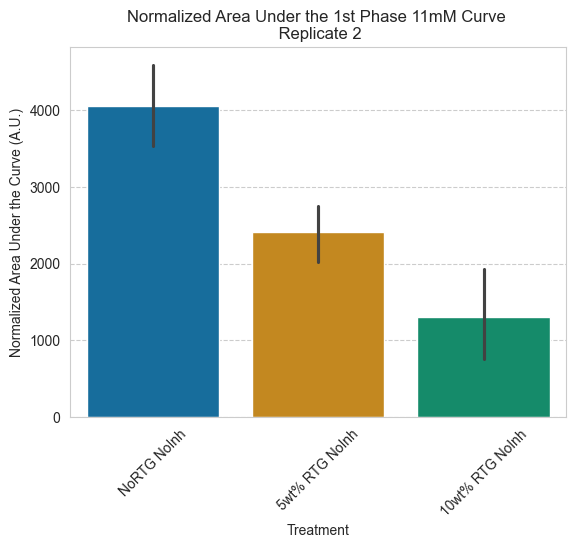

In [39]:
colors = sns.color_palette('colorblind', n_colors=len(treat))

ax = sns.barplot(md_plot, x="Treatment", y="AUC (rect)", hue="Treatment", palette = colors, estimator = "mean", order=order)


ax.set_ylabel('Normalized Area Under the Curve (A.U.)')

ax.set_title(f"Normalized Area Under the 1st Phase 11mM Curve \n Replicate {rep}")

plt.xticks(rotation=45)


plt.savefig(f'{folder}/graphs/Rep{rep}_11mM_curve_AUC_barplot.png', bbox_inches = "tight");

In [40]:
#md_plot[["Rep", "Islet"]] =  md_plot["Islet"].str.split(" - ", n = 1, expand = True)

In [41]:
md_plot[md_plot["Treatment"] == "5wt% RTG NoInh"]

Treatment  Duty Ratio  Avg On (sec) Example Cells   AUC (rect)  \
79   5wt% RTG NoInh    0.413333     11.470000       Cell 13  2629.500976   
86   5wt% RTG NoInh    0.475410      8.345556       Cell 20  2540.263597   
90   5wt% RTG NoInh    0.420690      8.777222       Cell 24  2513.730707   
93   5wt% RTG NoInh    0.440000      9.496667       Cell 27  3099.164592   
106  5wt% RTG NoInh    0.468750      9.712500       Cell 40  1496.437691   
115  5wt% RTG NoInh    0.509434     34.965000           AVG  2201.763375   

      AUC (trap)    Islet  
79   2639.731729  Islet 1  
86   2547.461474  Islet 1  
90   2520.437145  Islet 1  
93   3107.563213  Islet 1  
106  1500.440574  Islet 1  
115  2205.452354  Islet 1

/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/3583939778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(md_plot, x="Treatment", y="AUC (rect)", palette = colors, order=order)
/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/3583939778.py:3: UserWarning: The palette list has more values (25) than needed (3), which may not be intended.
  ax = sns.swarmplot(md_plot, x="Treatment", y="AUC (rect)", palette = colors, order=order)


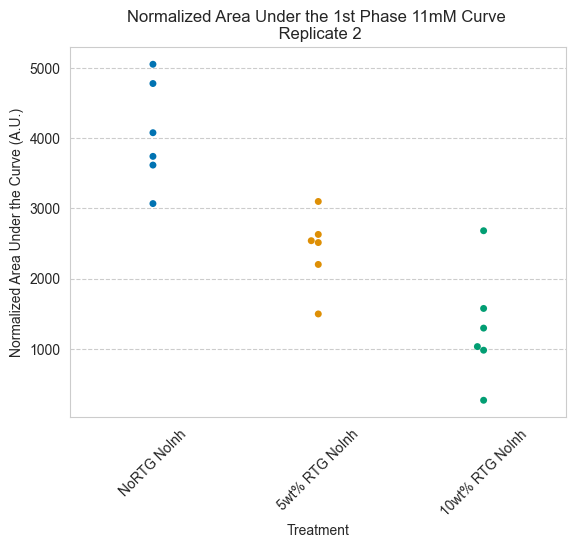

In [42]:
colors = sns.color_palette('colorblind', n_colors=len(treat))

ax = sns.swarmplot(md_plot, x="Treatment", y="AUC (rect)", palette = colors, order=order)


ax.set_ylabel('Normalized Area Under the Curve (A.U.)')

ax.set_title(f"Normalized Area Under the 1st Phase 11mM Curve \n Replicate {rep}")

plt.xticks(rotation=45)

plt.savefig(f'{folder}/graphs/Rep{rep}_11mM_curve_AUC_swarmplot.png', bbox_inches = "tight");
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), labels = ['Rep 1','Rep 2','Rep 3']);

In [43]:
md_plot = md_plot.loc[:,~md_plot.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [44]:
md_plot

Treatment  Duty Ratio  Avg On (sec) Example Cells   AUC (rect)  \
3        NoRTG NoInh    0.490415     11.693088        Cell 4  3741.848459   
7        NoRTG NoInh    0.487342      9.065000        Cell 8  3069.185471   
11       NoRTG NoInh    0.477895      8.908030       Cell 12  4079.027950   
14       NoRTG NoInh    0.459245      9.348281       Cell 15  4779.896464   
32       NoRTG NoInh    0.481928     10.360000       Cell 33  5054.328956   
34       NoRTG NoInh    0.429150     12.479091           AVG  3617.778462   
79    5wt% RTG NoInh    0.413333     11.470000       Cell 13  2629.500976   
86    5wt% RTG NoInh    0.475410      8.345556       Cell 20  2540.263597   
90    5wt% RTG NoInh    0.420690      8.777222       Cell 24  2513.730707   
93    5wt% RTG NoInh    0.440000      9.496667       Cell 27  3099.164592   
106   5wt% RTG NoInh    0.468750      9.712500       Cell 40  1496.437691   
115   5wt% RTG NoInh    0.509434     34.965000           AVG  2201.763375   
235  10wt% RTG NoInh    0.484581     11.870833        Cell 2  1031.398699   
236  10wt% RTG NoInh    0.492126     10.117188        Cell 3   979.818518   
246  10wt% RTG NoInh    0.492366     10.440938       Cell 13   266.482901   
251  10wt% RTG NoInh    0.489583      7.608125       Cell 18  2682.256835   
257  10wt% RTG NoInh    0.463542      9.604583       Cell 24  1574.891876   
264  10wt% RTG NoInh    0.435065     17.353000           AVG  1294.690760   

      AUC (trap)    Islet  
3    3747.369657  Islet 1  
7    3073.126985  Islet 1  
11   4082.107017  Islet 1  
14   4785.257149  Islet 1  
32   5060.184692  Islet 1  
34   3621.701280  Islet 1  
79   2639.731729  Islet 1  
86   2547.461474  Islet 1  
90   2520.437145  Islet 1  
93   3107.563213  Islet 1  
106  1500.440574  Islet 1  
115  2205.452354  Islet 1  
235  1035.364074  Islet 3  
236   984.207149  Islet 3  
246   266.769236  Islet 3  
251  2691.703799  Islet 3  
257  1583.189359  Islet 3  
264  1298.608780  Islet 3

/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/2848180492.py:3: UserWarning: The palette list has more values (25) than needed (2), which may not be intended.
  ax = sns.swarmplot(md_plot, x="Treatment", y="Duty Ratio", hue="Islet", palette = colors, order=order)


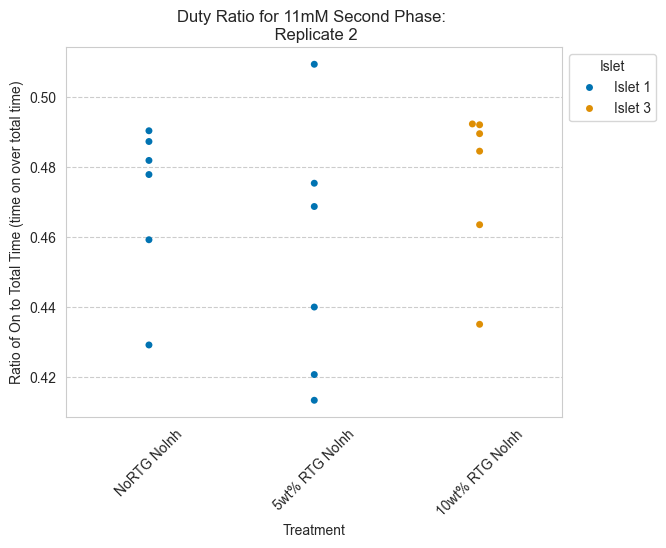

In [45]:
colors = sns.color_palette('colorblind', n_colors=len(treat))

ax = sns.swarmplot(md_plot, x="Treatment", y="Duty Ratio", hue="Islet", palette = colors, order=order)

ax.set_ylabel('Ratio of On to Total Time (time on over total time)')

ax.set_title(f"Duty Ratio for 11mM Second Phase: \n Replicate {rep}")

plt.xticks(rotation=45)

plt.savefig(f"{folder}/Rep{rep}_Duty Ratio.png", bbox_inches = "tight")
plt.savefig(f'{folder}/graphs/Rep{rep}_11mM_curve_duty_ratio_swarmplot.png', bbox_inches = "tight");
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1));

/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/798943453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(md_plot, x="Treatment", y="Duty Ratio", palette = colors, order=order)
/var/folders/l2/ql1ypp8x1217sf5tb_mw1cmh0000gp/T/ipykernel_40553/798943453.py:3: UserWarning: The palette list has more values (25) than needed (3), which may not be intended.
  ax = sns.barplot(md_plot, x="Treatment", y="Duty Ratio", palette = colors, order=order)


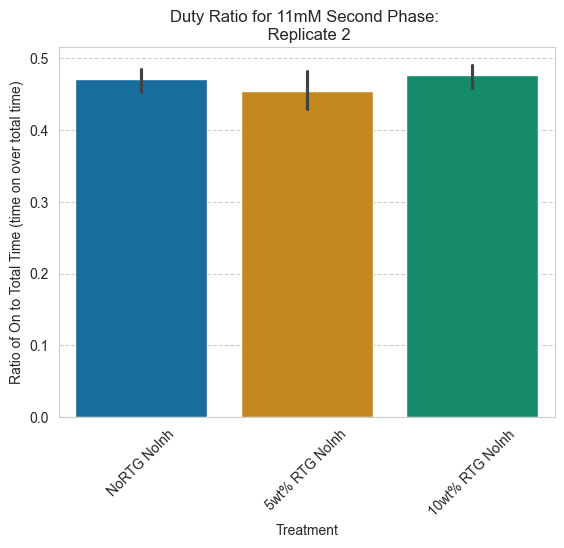

In [46]:
colors = sns.color_palette('colorblind', n_colors=len(treat))

ax = sns.barplot(md_plot, x="Treatment", y="Duty Ratio", palette = colors, order=order)


ax.set_ylabel('Ratio of On to Total Time (time on over total time)')

ax.set_title(f"Duty Ratio for 11mM Second Phase: \n Replicate {rep}")

plt.xticks(rotation=45)

plt.savefig(f'{folder}/graphs/Rep{rep}_11mM_curve_duty_ratio_barplot.png', bbox_inches = "tight");
